In [1]:
##Imports

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##Bring in the dataset from the scientific paper 'Muscle Transcriptional Networks Linked to Resistance Exercise Training Hypertrophic Response Heterogeneity'

##Bringing in the dataset from the 'red module' analyzed in the prediction section of the pipeline
## this data is the group of genes that have the highest positive correlation with the muscle increase found in the results

df= pd.read_excel('Table_S2.xlsx')

df.head()

,"Table S2: Genes in WGCNA Prediction analysis red module (n = 307), strength of association with change in mid-thigh muscle area as measured by CT, and top LV/pathway association in PLIER",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,red,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,red,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,red,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining


In [3]:
## Set column names to row 1

df.columns = df.iloc[1]

df.head()

1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,red,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,red,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,red,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining


In [4]:
## drop empty rows

df = df.drop([0,1])
df.reset_index()
df.head()

1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,red,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,red,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,red,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining
5,red,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining
6,red,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining


In [5]:
## use .info() and .describe() and .dtypes() to get a view

df.info()
df.describe()

### notice: the dtypes, the amounts of unique genes, potential missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 2 to 308
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   module        307 non-null    object
 1   membership    307 non-null    object
 2   traitsig      307 non-null    object
 3   ensg_version  307 non-null    object
 4   gene          307 non-null    object
 5   LV_number     97 non-null     object
 6   LV_pathway    97 non-null     object
dtypes: object(7)
memory usage: 16.9+ KB


1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
count,307,307.0000,307.0000,307,307,97,97
unique,1,297.0000,293.0000,307,307,15,10
top,red,0.4352,0.4325,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
freq,307,3.0000,3.0000,1,1,41,46


In [6]:
### check for NANs

df.isna().any()
df.isna().sum()

## also note that it may not be worth it to include the genes without pathway int the final dataframe unless there is a different way to find pathways


1
module            0
membership        0
traitsig          0
ensg_version      0
gene              0
LV_number       210
LV_pathway      210
dtype: int64

In [7]:
### drop the module column as it is not needed for this analysis... it was a vestige of the paper it came from

df = df.drop(columns=['module'])
df.head()

1,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining
5,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining
6,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining


In [8]:
### transform the dtypes with the .astype()

## membershup and traitsig into float64

##LV_number into int  need to 

## ensg_version, gene,and lv_pathway are good

df = df.astype({'membership': 'float64'})
df = df.astype({'traitsig': 'float64'})
df = df.astype({'LV_number': 'category'})
df.head()


1,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining
5,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining
6,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining


In [9]:
#inspect membership and traitsig columns to find the maximum and minimum

df['membership'].describe()

### should there be a minimum limit for genes membership in the module

count    307.000000
mean       0.569397
std        0.117803
min        0.209100
25%        0.475950
50%        0.572400
75%        0.666600
max        0.838100
Name: membership, dtype: float64

In [10]:
df['traitsig'].describe()

count    307.000000
mean       0.424034
std        0.133645
min        0.029100
25%        0.333600
50%        0.434500
75%        0.524300
max        0.765800
Name: traitsig, dtype: float64

In [11]:
### try to see how the describes change with a subset without genes that dont belong to an already specific pathway

not_null = df.notnull().all(axis=1)
not_null_df = df[not_null]
not_null_df.describe()


1,membership,traitsig
count,97.000000,97.000000
mean,0.618047,0.426052
std,0.107244,0.146436
min,0.343900,0.082200
25%,0.549700,0.326400
50%,0.637900,0.447500
75%,0.698600,0.526900
max,0.838100,0.765800


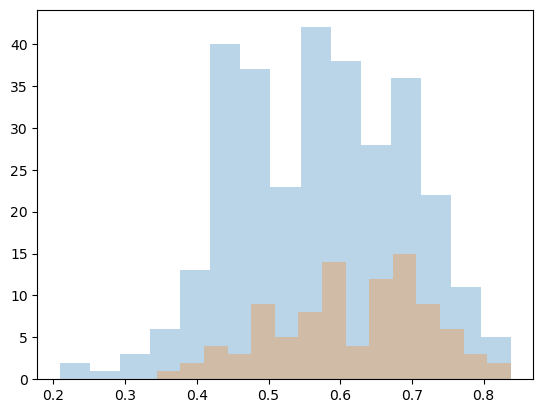

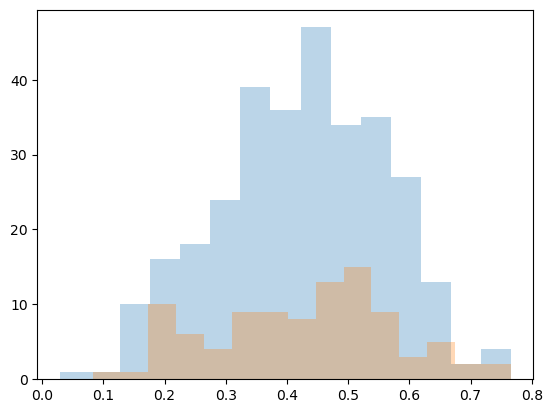

In [12]:
### appears that for membership: the mean and median increase, std remains very close
### appears that for traitsig: the mean and median are very close, std is also very close

## maybe we should try and view the distribution of numbers with a histogram comparing both with the NAs and without


mem_with_na = df['membership']
mem_without_na = not_null_df['membership']
trait_with_na = df['traitsig']
trait_without_na= not_null_df['traitsig']

##plot with 

plt.hist(x=df['membership'], bins=15, alpha= .3)
plt.hist(x=not_null_df['membership'], bins=15, alpha = .3)
plt.show()

plt.hist(x=df['traitsig'], bins=15, alpha= .3)
plt.hist(x=not_null_df['traitsig'], bins=15, alpha = .3)
plt.show()

###seems that the distribution pattern is not very close despite means and medians being so similar, should probably find a way to find pathways for those genes


In [13]:
#### now goiing to use ncbi to overcome a limitation to the pathway to nutrient approach

import re
from collections import defaultdict
from io import BytesIO, StringIO
from pathlib import Path
from zipfile import ZipFile
import matplotlib.pyplot as plt
from Bio import AlignIO, Phylo, SeqIO
from Bio.Align.Applications import MuscleCommandline
from Bio.Phylo.TreeConstruction import (
    NNITreeSearcher,
    ParsimonyScorer,
    ParsimonyTreeConstructor,
)
from Bio.SeqRecord import SeqRecord
from ncbi.datasets import GeneApi

/opt/anaconda3/lib/python3.11/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [14]:
##store the taxon... humans!
## store the symbols to be read by the gene_api()

##make gene_api to store the method

taxon = 'human'
symbols = df['gene'].tolist()
print (type(symbols))

gene_api = GeneApi()



<class 'list'>


In [15]:
##now access the metadata for the genes

metadata = gene_api.gene_metadata_by_tax_and_symbol(symbols, taxon)

#print(metadata)

In [16]:
#print (type(metadata.genes))
#print (metadata.genes)

In [17]:
###accesses the brief string of data that can be utilized to count for enzymes and store the enzymes in a list that will be added to a dataframe so taht it can be edited there

###this shows an attriubte error with cants get a desciption of nonetype because some symbols fed were not matches with NCBI
gene_des = {}

for gene_data in metadata.genes:
    
    x = gene_data.gene.description
    y = gene_data.gene.symbol
    
    gene_des[y] = x
    


AttributeError: 'NoneType' object has no attribute 'description'

In [22]:
##proof that the descriptions were created

## also the length is not the same as the amount of genes presented

print (gene_des)
print (len(gene_des))

{'HOTAIR': 'HOX transcript antisense RNA', 'LINC00892': 'long intergenic non-protein coding RNA 892', 'LINC00605': 'long intergenic non-protein coding RNA 605', 'IPO5P1': 'importin 5 pseudogene 1', 'GOLGA8DP': 'golgin A8 family member D, pseudogene', 'C2CD4D': 'C2 calcium dependent domain containing 4D', 'TROAP': 'trophinin associated protein', 'RPL32P9': 'ribosomal protein L32 pseudogene 9', 'BNIP3P17': 'BCL2 interacting protein 3 pseudogene 17', 'CARD8-AS1': 'CARD8 antisense RNA 1', 'LINC00943': 'long intergenic non-protein coding RNA 943', 'LINC00968': 'long intergenic non-protein coding RNA 968', 'RAB4B-EGLN2': 'RAB4B-EGLN2 readthrough (NMD candidate)', 'IL18BP': 'interleukin 18 binding protein', 'IL21-AS1': 'IL21 antisense RNA 1', 'LHFPL2': 'LHFPL tetraspan subfamily member 2', 'IL6R-AS1': 'IL6R antisense RNA 1', 'ZNF433-AS1': 'ZNF433 and ZNF878 antisense RNA 1', 'LINC02285': 'long intergenic non-protein coding RNA 2285', 'MYMX': 'myomixer, myoblast fusion factor', 'KCNMB2': 'pota

In [23]:
##now make the list into a dataframe column that will be concatenated with the original dataframe upon editing


##split the dictionary into key and value lists
keys = []
values = []

for key,value in gene_des.items():
    keys.append(key)
    values.append(value)
    

    

##turn lists into two columns.. will use the names to join with original dataframe because not all genes showed up in search

data = {'gene': keys,
        'enzyme_des': values}

df_des = pd.DataFrame(data)


print (df_des.head())
df_des.describe()

        gene                                  enzyme_des
0     HOTAIR                HOX transcript antisense RNA
1  LINC00892  long intergenic non-protein coding RNA 892
2  LINC00605  long intergenic non-protein coding RNA 605
3     IPO5P1                     importin 5 pseudogene 1
4   GOLGA8DP       golgin A8 family member D, pseudogene


,gene,enzyme_des
count,264,264
unique,264,264
top,HOTAIR,HOX transcript antisense RNA
freq,1,1


In [24]:
##now iterate over the descriptions and isolate words ending with ase and print the word
###if no ase then print other

enz_list = []

for x in df_des['enzyme_des']:
    ase = 'ase'
    li_st = [i for i in x.split() if ase in i ]
    if li_st == []:
        li_st_ = 'other'
        #have to specify below because one value is redundant
    else:
        li_st_ = li_st[0]
    
    enz_list.append(li_st_)
        
print (enz_list)
print(len(enz_list))
  

['other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'deaminase', 'other', 'other', 'carboxypeptidase', 'other', 'kinase', 'other', 'kinase', 'other', 'metallopeptidase', 'other', 'other', 'other', 'other', 'other', 'kinase', 'anhydrase', 'cyclase', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'kinase', 'other', 'other', 'other', 'other', 'other', 'kinase', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'dehydrogenase', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'kinase', 'other', 'GTPase', 'other', 'alpha-L-fucosidase', 'kinase', 'other', 'beta-secretase', 'other', 'other', 'other', 'other', 'o

In [25]:
## now make new dataframe containing gene names and their corresponding enzyme

data_2 = {'gene': keys,
        'assoc_enzymes': enz_list}

df_enz = pd.DataFrame(data_2)


print (df_enz.head())
df_enz.describe()

        gene assoc_enzymes
0     HOTAIR         other
1  LINC00892         other
2  LINC00605         other
3     IPO5P1         other
4   GOLGA8DP         other


,gene,assoc_enzymes
count,264,264
unique,264,35
top,HOTAIR,other
freq,1,212


In [26]:
##subset to check on describe without the 'other' as a filler

df_enz_without_other = df_enz[df_enz['assoc_enzymes'] != 'other']

df_enz_without_other.describe()

### seems that in the 264 genes that were hits for genes in the NCBI dataset, it seems that 52 are hits for making enzymes

,gene,assoc_enzymes
count,52,52
unique,52,34
top,ADAR,kinase
freq,1,9


In [27]:
### now time to merge df with df_enz_without_other  use an left so that the missing gene/enzyme data is not touched

df_2 = df.merge(df_enz, how='inner', on='gene')

df_2.head()

,membership,traitsig,ensg_version,gene,LV_number,LV_pathway,assoc_enzymes
0,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining,other
1,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining,deaminase
2,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining,other
3,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining,GTPase
4,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining,kinase


In [28]:
df_2.describe()

##seems like this is missing 12 values from the originally processed 264.... lets see if that impact that genes with known enzymes

,membership,traitsig
count,252.000000,252.000000
mean,0.584875,0.433260
std,0.114327,0.137893
min,0.236800,0.029100
25%,0.493000,0.345375
50%,0.589450,0.448900
75%,0.678075,0.532750
max,0.838100,0.765800


In [29]:
df_2_without_other = df_2[df_2['assoc_enzymes'] != 'other']

df_2_without_other.describe()

##its missing two!!!

,membership,traitsig
count,50.000000,50.000000
mean,0.586992,0.406314
std,0.110572,0.143765
min,0.303700,0.082200
25%,0.497425,0.313175
50%,0.602200,0.396450
75%,0.677300,0.513150
max,0.760100,0.639500


In [30]:
s1 = df['gene']
s2 = df_enz['gene']
df_compare = pd.concat([s1,s2])

print(df_compare)

2        IFI44L
3          ADAR
4         TRAF5
5      ARHGAP25
6         MERTK
         ...   
259      RASSF2
260      TRANK1
261    RABGAP1L
262    ARHGAP25
263       PTBP3
Name: gene, Length: 571, dtype: object


In [31]:
##there should be 264 duplicates but expecting 252 to show up

print(len(df_compare[df_compare.duplicated() == True]))


252


In [32]:
##use set theory to find the 10 gene names that changed in the ncbi query output

duplicated = df_compare[df_compare.duplicated() == True].tolist()
duplicated_set = set(duplicated)

ncbi_gene_list = df_enz['gene'].tolist()
ncbi_gene_set = set(ncbi_gene_list)

diff = ncbi_gene_set - duplicated_set

print (diff)




{'PABIR2', 'H2BC26', 'SLC66A3', 'DIPK1C', 'SEPTIN6', 'TASL', 'FCGR1BP', 'IFTAP', 'CFAP91', 'DYNLT4', 'ACP3', 'TLCD5'}


In [33]:
## lets turn the original name of genes into a set as well and play with set subtraction
## see if theres any really obvious name changes that we can not

orig_gene_list = df['gene'].tolist()
orig_gene_set = set(orig_gene_list)

ncbi_diff = orig_gene_set - ncbi_gene_set

print (ncbi_diff)

#so in this resulting set must be the aliases for the 12 that were lost in translation
##lets save ourselves some hassel by findinf the above genes that corresponded to an enzyme and just manually add the enzyme in

{'AL021328.1', 'AC104772.1', 'TMEM136', 'AL606760.1', 'FP565260.3', 'AC012313.2', 'FAM69C', 'FAM122B', 'AL359762.1', 'C11orf74', 'AL031595.1', 'AC245100.4', 'AL109811.2', 'AC019257.7', 'AP000525.1', 'AC244502.1', 'FCGR1B', 'PQLC3', 'AC113382.2', 'AF117829.1', 'AL365209.1', 'AL445472.1', 'AL133355.1', 'AF127936.2', 'AC012485.3', 'AC020915.3', 'CXorf21', 'AC011477.1', 'HIST3H2BB', 'AL353746.1', 'AC106795.5', 'SEPT6', 'AC069209.1', 'TCTEX1D4', 'ACPP', 'AC011511.4', 'AD000864.1', 'AC099548.2', 'AC098820.2', 'AC008581.1', 'AC104663.1', 'AL034397.3', 'AP001646.2', 'AL731533.2', 'AL161785.1', 'AC091488.1', 'AC004847.1', 'AC098484.3', 'AC114271.1', 'AC105749.1', 'AC131097.4', 'AC027702.1', 'MAATS1', 'AC131902.2', 'AC125611.3'}


In [34]:
##turn the original diff set into a list now
diff_as_a_list = list(diff)


#now use boolean logic to grab the two genes that have an enzyme associated with them
df_enz_without_other_and_set = df_enz[df_enz['gene'].isin(diff_as_a_list)]

print (df_enz_without_other_and_set)

###so it is DIPK1C and ACP3 that we need to search for aliases

##'DIPK1C' is 'FAM69C' in the original gene names and 'ACP3' is 'ACPP' in original



        gene assoc_enzymes
46     IFTAP         other
50    DIPK1C        kinase
52    H2BC26         other
55   SLC66A3         other
67    PABIR2         other
82     TLCD5         other
85   FCGR1BP         other
88   SEPTIN6         other
125   DYNLT4         other
176     ACP3   phosphatase
222     TASL         other
242   CFAP91         other


In [35]:
## lets edit the merged dataframe df_2 on the gene names FAM69C and ACPP



row_number_FAM69C = df[df['gene'] == 'FAM69C'].index

print(row_number_FAM69C)

print (df.iloc[253])

row_number_ACPP = df[df['gene'] == 'ACPP'].index

print(row_number_ACPP)

print (df.iloc[141])

###for above note how the index values are off by two^^ maybe because of the drop of the first two rows in the start


FAM69C_row = {'membership': 0.4532, 'traitsig': 0.3218, 'ensg_version': 'ENSG00000187773.8', 'gene': 'FAM69C', 'LV_number': None, 'LV_pathway':None , 'assoc_enzymes':'kinase'}

df_2.loc[len(df_2)] = FAM69C_row

ACPP_row = {'membership': 0.6015, 'traitsig': 0.4211, 'ensg_version': 'ENSG00000014257.15', 'gene': 'ACPP', 'LV_number':None , 'LV_pathway':None , 'assoc_enzymes':'phosphatase'}

df_2.loc[len(df_2)] = ACPP_row

Index([255], dtype='int64')
1
membership                 0.4532
traitsig                   0.3218
ensg_version    ENSG00000187773.8
gene                       FAM69C
LV_number                     NaN
LV_pathway                    NaN
Name: 255, dtype: object
Index([143], dtype='int64')
1
membership                  0.6015
traitsig                    0.4211
ensg_version    ENSG00000014257.15
gene                          ACPP
LV_number                      NaN
LV_pathway                     NaN
Name: 143, dtype: object


/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_8639/1884923075.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2.loc[len(df_2)] = FAM69C_row
/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_8639/1884923075.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2.loc[len(df_2)] = ACPP_row


In [36]:
## now lets check that the two values were added
df_2_without_other = df_2[df_2['assoc_enzymes'] != 'other']

df_2_without_other.describe()

##checks out

,membership,traitsig
count,52.000000,52.000000
mean,0.584698,0.404973
std,0.109984,0.141422
min,0.303700,0.082200
25%,0.495275,0.316325
50%,0.601500,0.396450
75%,0.675900,0.512850
max,0.760100,0.639500


In [37]:
print(df_2.tail())

     membership  traitsig        ensg_version    gene LV_number LV_pathway  \
249      0.4009    0.4590   ENSG00000183837.9   PNMA3       NaN        NaN   
250      0.6261    0.6430  ENSG00000160219.11    GAB3       NaN        NaN   
251      0.5075    0.5812   ENSG00000155961.4  RAB39B       NaN        NaN   
252      0.4532    0.3218   ENSG00000187773.8  FAM69C       NaN       None   
253      0.6015    0.4211  ENSG00000014257.15    ACPP       NaN       None   

    assoc_enzymes  
249         other  
250         other  
251         other  
252        kinase  
253   phosphatase  


In [38]:
df_2['membership'].dtype
df_2['traitsig'].dtype

dtype('float64')

In [39]:
##now lets categorize the specifc enzymes into their broad groups
##notice how one of the GTPase has a comma in its string
print(df_2['assoc_enzymes'].unique())
print (len(df_2['assoc_enzymes'].unique()))

['other' 'deaminase' 'GTPase' 'kinase'
 '6-beta-N-acetylglucosaminyltransferase' 'scramblase' 'ATPase' 'oxidase'
 'GTPase,' 'metallopeptidase' 'caspase' 'synthetase' 'phosphatase'
 'beta-secretase' 'dehydrogenase' 'glutaminase' 'cyclase' 'endonuclease'
 'desaturase' 'peroxidase' 'glucosyltransferase' '4-hydroxylase'
 'isopentenyltransferase' 'reductase' 'dihydropyrimidinase' 'peptidase'
 'helicase' 'lyase' 'alpha-L-fucosidase' 'carboxypeptidase'
 'sulfotransferase' 'synthase' 'dehydrogenase/reductase'
 'phosphodiesterase' 'anhydrase']
35


In [40]:
##there are 7 EC (enzyme classifications):
#1 oxidoreductase
#2 transferase
#3 hydrolase
#4 lyase
#5 isomerase
#6 ligase
#7 translocase
##above there are some names that have a clear mapping,  but because some are not lets just do this step manually

oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase']
lyase = ['cyclase', 'lyase', 'anhydrase']
isomerase = []
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

enzyme_class = []

for x in range(len(df_2['assoc_enzymes'])):
    if df_2['assoc_enzymes'][x] in ec[0]:
        enzyme_class.append(1)
    elif df_2['assoc_enzymes'][x] in ec[1]:
        enzyme_class.append(2)
    elif df_2['assoc_enzymes'][x] in ec[2]:
        enzyme_class.append(3)
    elif df_2['assoc_enzymes'][x] in ec[3]:
        enzyme_class.append(4)
    elif df_2['assoc_enzymes'][x] in ec[5]:
        enzyme_class.append(6)
    elif df_2['assoc_enzymes'][x] in ec[6]:
        enzyme_class.append(7)
    else:
        enzyme_class.append(0)




In [41]:
##lets add this list as a new column to the df_2

df_2['enzyme_class'] = enzyme_class

print (df_2.head())

   membership  traitsig        ensg_version      gene LV_number  \
0      0.5158    0.2172  ENSG00000137959.15    IFI44L         2   
1      0.5497    0.4713  ENSG00000160710.16      ADAR         2   
2      0.7754    0.5447  ENSG00000082512.14     TRAF5         2   
3      0.7309    0.4325  ENSG00000163219.11  ARHGAP25         2   
4      0.5587    0.4396  ENSG00000153208.16     MERTK         2   

                LV_pathway assoc_enzymes  enzyme_class  
0  MetaMEx_AerobicTraining         other             0  
1  MetaMEx_AerobicTraining     deaminase             3  
2  MetaMEx_AerobicTraining         other             0  
3  MetaMEx_AerobicTraining        GTPase             3  
4  MetaMEx_AerobicTraining        kinase             2  


In [42]:
df_2.groupby(['enzyme_class'])['membership'].count()

enzyme_class
0    202
1      8
2     13
3     23
4      3
6      4
7      1
Name: membership, dtype: int64

In [43]:
### time to get the nutrition values
## the list of nutritions that the FDA has daily limits on are: 
nutrients= ['Vitamin A','Vitamin C', 'Calcium', 'Iron', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Thiamin', 'Riboflavin', 'Niacin', 'Vitamin B6', 'Folate', 'Vitamin B12', 'Biotin', 'Pantothenic Acid', 'Phosphorous', 'Iodine', 'Magnesium', 'Zinc', 'Selenium', 'Copper', 'Manganese', 'Chromium', 'Molybdenum', 'Chloride', 'Potassium', 'Choline']

#will import the pdf into a dataframe later

In [44]:
##now lets scrape wikipedia for the nutrients and their respsective enzymes, beginning with Vitamin A
import wikipedia

wiki = wikipedia.page('Vitamin A')

text = wiki.content

text = text.replace('==', '')

text = text.replace('\n', '')[:-12]
print(text)

Vitamin A is a fat-soluble vitamin and an essential nutrient for animals. The term "vitamin A" encompasses a group of chemically related organic compounds that includes retinol, retinal (also known as retinaldehyde), retinoic acid, and several provitamin (precursor) carotenoids, most notably beta-carotene. Vitamin A has multiple functions: it is essential for embryo development and growth, for maintenance of the immune system, and for vision, where it combines with the protein opsin to form rhodopsin – the light-absorbing molecule necessary for both low-light (scotopic vision) and color vision.Vitamin A occurs as two principal forms in foods: A) retinol, found in animal-sourced foods, either as retinol or bound to a fatty acid to become a retinyl ester, and B) the carotenoids alpha-carotene, β-carotene, gamma-carotene, and the xanthophyll beta-cryptoxanthin (all of which contain β-ionone rings) that function as provitamin A in herbivore and omnivore animals which possess the enzymes th

In [45]:
##lets go over the text in search of 'ase' that indicates enzymes... note that I am aware this is more of an association and that legitimate logic, a certain limitation of the data
text = text.replace(".", "")
text = text.replace(':','')
text = text.replace(',','')
text = text.replace('-','')
text = text.replace("'",'')
text = text.replace('(','')
text = text.replace(')','')



text = str(text)
text = text.split()

vit_a_enzymes = []

#for x in text:
    #ase = 'ase'
    #if ase in x:
        #vit_a_enzymes.append(x)
    
#print (vit_a_enzymes)

###seems like there are a lot of extra words lets make a list to not include

In [46]:
not_useful_ase = ['case', 'cases', 'increase', 'increases', 'increased', 'increasing','decrease', 'decreases', 'decreased','decreasing','release','releases','released','releasing','cease','ceases','ceased','ceasing','base','bases','based','disease','diseases','database','Disease','Diseases','Diseased','Increased','Increase', 'Increases','Decrease','Decreases', 'Decreased']

for x in text:
    ase = 'ase'
    if x not in not_useful_ase and ase in x:
        vit_a_enzymes.append(x)

    
print (vit_a_enzymes)


['dehydrogenases', 'reductasesretinal', 'dehydrogenaseretinal', 'hydrolases', 'acyltransferase', '1515dioxygenase', '1515monooxygenase', 'hydrolase', 'dehydrogenases', 'dehydrogenases', 'dehydrogenase', 'diseasesLymphocytes', '15monooxygenase', '1515dioxygenase', 'dehydrogenase', '1515dioxygenase', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase']


In [47]:
### vit_a_enzymes looks great now lets ditch the last remaining non enzyme diseasesLymphocytes and then do an analysis with enzyme class 

#vit_a_enzymes.remove('diseasesLymphocytes')


In [48]:
### lets update our ec lists to accomodate these new names. will probably be helpful for future

oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase']
lyase = ['cyclase', 'lyase', 'anhydrase']
isomerase = []
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

vit_a_ec_distribution= []

for x in range(len(vit_a_enzymes)):
    if vit_a_enzymes[x] in ec[0]:
        vit_a_ec_distribution.append(1)
    elif vit_a_enzymes[x] in ec[1]:
        vit_a_ec_distribution.append(2)
    elif vit_a_enzymes[x] in ec[2]:
        vit_a_ec_distribution.append(3)
    elif vit_a_enzymes[x] in ec[3]:
        vit_a_ec_distribution.append(4)
    elif vit_a_enzymes[x] in ec[4]:
        vit_a_ec_distribution.append(5)
    elif vit_a_enzymes[x] in ec[5]:
        vit_a_ec_distribution.append(6)
    elif vit_a_enzymes[x] in ec[6]:
        vit_a_ec_distribution.append(7)
    else:
        vit_a_ec_distribution.append(0)
        
print (vit_a_ec_distribution)

[1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [49]:
# lets find the ratio of each enzyme classification in the text and record it as a dictionary... more realistic with as a text association weight

def vit_rat_dict(vit_list):
    
    history= []
    
    dict_rat ={}
    
    for x in range(len(vit_list)):
        if vit_list[x] not in history and vit_list[x] != 0:
            y = (vit_list.count(vit_list[x]))/len([i for i in vit_list if i !=0])
            z = vit_list[x]
            dict_rat[z]= y
            history.append(list[x])
        elif list[x] in history:
            print('no')
            
    return dict_rat

        

In [50]:
## lets test out the function

ratio_a = vit_rat_dict(vit_a_ec_distribution)

print (ratio_a)

{1: 0.85, 3: 0.1, 2: 0.05}


In [51]:
### now we can see that Vitamin As wiki description's listed enzymes were 85% oxidoreductases, 10% hydrolases, and 5% transferase

In [52]:
## time to make a function that will run the 26 other nutrients in the original list

def nutrient_text_enzymes(nutrient):
    
    wiki = wikipedia.page(nutrient)

    text = wiki.content

    text = text.replace('==', '')

    text = text.replace('\n', '')[:-12]
    print (text)
    text = text.replace(".", "")
    text = text.replace(':','')
    text = text.replace(',','')
    text = text.replace('-',' ')
    text = text.replace("'",'')
    text = text.replace('(','')
    text = text.replace(')','')
    text = text.replace('=','')
    text = text.replace('"','')



    text = str(text)
    text = text.split()
    enzymes = []
    
    not_useful_ase = ['case', 'cases', 'increase', 'increases', 'increased', 'increasing','decrease', 'decreases', 'decreased','decreasing','release','releases','released','releasing','cease','ceases','ceased','ceasing','base','bases','based','disease','diseases','database','Cases','cerealbased','baseline','proteinbased','plantbased','increasesThe','grease','greases','greased','D3based']

    for x in text:
        ase = 'ase'
        if x not in not_useful_ase and ase in x:
            enzymes.append(x)
            
    return enzymes

###lets see what it spits out for next on the list

In [53]:
###the titling is super weird, if i put in Vitamin C it returns A's description?? if put into Vitamin D it returns Vitamin E's description??? somehow puttin the period between it works

vit_c_enzymes = nutrient_text_enzymes('Vitamin.C')

print (vit_c_enzymes)
print (len(vit_c_enzymes))

Vitamin C (also known as ascorbic acid and ascorbate) is a water-soluble vitamin found in citrus and other fruits, berries and vegetables. It is also a generic prescription medication and in some countries is sold as a non-prescription dietary supplement. As a therapy, it is used to prevent and treat scurvy, a disease caused by vitamin C deficiency.Vitamin C is an essential nutrient involved in the repair of tissue, the formation of collagen, and the enzymatic production of certain neurotransmitters. It is required for the functioning of several enzymes and is important for immune system function. It also functions as an antioxidant. Vitamin C may be taken by mouth or by intramuscular, subcutaneous or intravenous injection. Various health claims exist on the basis that moderate vitamin C deficiency increases disease risk, such as for the common cold, cancer or COVID-19. There are also claims of benefits from vitamin C supplementation in excess of the recommended dietary intake for peop

In [54]:
##lets make a function that will do enzyme classification with what we have already and then edit the lists

oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase']
lyase = ['cyclase', 'lyase', 'anhydrase']
isomerase = []
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

def enzyme_classify(enzyme_list):
    
    vit_distribution= []

    for x in range(len(enzyme_list)):
        if enzyme_list[x] in ec[0]:
            vit_distribution.append(1)
        elif enzyme_list[x] in ec[1]:
            vit_distribution.append(2)
        elif enzyme_list[x] in ec[2]:
            vit_distribution.append(3)
        elif enzyme_list[x] in ec[3]:
            vit_distribution.append(4)
        elif enzyme_list[x] in ec[4]:
            vit_distribution.append(5)
        elif enzyme_list[x] in ec[5]:
            vit_distribution.append(6)
        elif enzyme_list[x] in ec[6]:
            vit_distribution.append(7)
        else:
            vit_distribution.append(0)
            
    return vit_distribution
    

In [55]:
#vit_c_distribution = enzyme_classify(vit_c_enzymes)

#print (vit_c_distribution)
###looks like we are missing a lot

In [56]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between']
lyase = ['cyclase', 'lyase', 'anhydrase']
isomerase = []
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]


vit_c_distribution = enzyme_classify(vit_c_enzymes)

print (vit_c_distribution)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 3, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1]


In [57]:
ratio_c = vit_rat_dict(vit_c_distribution)

print (ratio_c)

{1: 0.78125, 2: 0.09375, 3: 0.0625, 6: 0.0625}


In [58]:
###hmmm seems like vitamin C also is heavily text associated with oxidoreductase enzymes

In [59]:
## time to move onto the next to see how it flows without any breaks

#vit_d_enzymes = nutrient_text_enzymes('Vitamin.D')

#print (vit_d_enzymes)
#print (len(vit_d_enzymes))

#vit_d_distribution = enzyme_classify(vit_d_enzymes)

#print (vit_d_distribution)

#ratio_d = vit_rat_dict(vit_d_distribution)

#print (ratio_d)

In [60]:
####its good for a start but needs some tuning again
vit_d_enzymes = nutrient_text_enzymes('Vitamin.D')

print (vit_d_enzymes)
print (len(vit_d_enzymes))


Vitamin D is a group of fat-soluble secosteroids responsible for increasing intestinal absorption of calcium, magnesium, and phosphate, and for many other biological effects. In humans, the most important compounds in this group are vitamin D3 (cholecalciferol) and vitamin D2 (ergocalciferol).The major natural source of vitamin D is synthesis of cholecalciferol in the lower layers of the epidermis of the skin, through a photochemical reaction with Ultraviolet B (UV-B) radiation from sun exposure or UV-B lamps. Cholecalciferol and ergocalciferol can be ingested from the diet and supplements. Only a few foods, such as the flesh of fatty fish, naturally contain significant amounts of vitamin D. In the U.S. and other countries, cow's milk and plant-derived milk substitutes are fortified with vitamin D, as are many breakfast cereals. Mushrooms exposed to ultraviolet light contribute useful amounts of vitamin D2. Dietary recommendations typically assume that all of a person's vitamin D is ta

In [61]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between']
lyase = ['cyclase', 'lyase', 'anhydrase']
isomerase = []
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

vit_d_distribution = enzyme_classify(vit_d_enzymes)

print (vit_d_distribution)

[1, 6, 1, 1, 1, 1, 1]


In [62]:
ratio_d = vit_rat_dict(vit_d_distribution)

print (ratio_d)

{1: 0.8571428571428571, 6: 0.14285714285714285}


In [63]:
### so we are a ninth done and all of the enzymes seem to be heavy in the oxidoreductase ratio

vit_e_enzymes = nutrient_text_enzymes('Vitamin.E')

print (vit_e_enzymes)
print (len(vit_e_enzymes))

vit_e_distribution = enzyme_classify(vit_e_enzymes)

print (vit_e_distribution)

ratio_e = vit_rat_dict(vit_e_distribution)

print (ratio_e)

###lets tweak the ratio function so that words that are zeros no longer end up in the final ratio dict

Vitamin E is a group of eight fat soluble compounds that include four tocopherols and four tocotrienols. Vitamin E deficiency, which is rare and usually due to an underlying problem with digesting dietary fat rather than from a diet low in vitamin E, can cause nerve problems. Vitamin E is a fat-soluble antioxidant which may help protect cell membranes from reactive oxygen species. Worldwide, government organizations recommend adults consume in the range of 3 to 15 mg per day. As of 2016, consumption was below recommendations according to a worldwide summary of more than one hundred studies that reported a median dietary intake of 6.2 mg per day for alpha-tocopherol. Foods rich in vitamin E include seeds and nuts, seed oils, peanut butter, and vitamin E-fortified foods, such as margarine.Population studies suggested that people who consumed foods with more vitamin E, or who chose on their own to consume a vitamin E dietary supplement, had lower incidence of cardiovascular diseases, canc

In [64]:
##vitaminK!


vit_k_enzymes = nutrient_text_enzymes('Vitamin.K')

print (vit_k_enzymes)
print (len(vit_k_enzymes))

oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between']
lyase = ['cyclase', 'lyase', 'anhydrase']
isomerase = []
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

vit_k_distribution = enzyme_classify(vit_k_enzymes)

print (vit_k_distribution)

ratio_k = vit_rat_dict(vit_k_distribution)

print (ratio_k)


Vitamin K is a family of structurally similar, fat-soluble vitamers found in foods and marketed as dietary supplements. The human body requires vitamin K for post-synthesis modification of certain proteins that are required for blood coagulation ("K" from German/Danish koagulation, for "coagulation") or for controlling binding of calcium in bones and other tissues. The complete synthesis involves final modification of these so-called "Gla proteins" by the enzyme gamma-glutamyl carboxylase that uses vitamin K as a cofactor.Vitamin K is used in the liver as the intermediate VKH2 to deprotonate a glutamate residue and then is reprocessed into vitamin K through a vitamin K oxide intermediate. The presence of uncarboxylated proteins indicates a vitamin K deficiency. Carboxylation allows them to bind (chelate) calcium ions, which they cannot do otherwise. Without vitamin K, blood coagulation is seriously impaired, and uncontrolled bleeding occurs. Research suggests that deficiency of vitamin

In [65]:
###lets see how wikipedia accepts the super and sub scripts


vit_b6_enzymes = nutrient_text_enzymes('Vitamin.B6')

print (vit_b6_enzymes)
print (len(vit_b6_enzymes))

oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase']
isomerase = ['racemase']
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

vit_b6_distribution = enzyme_classify(vit_b6_enzymes)

print (vit_b6_distribution)

ratio_b6 = vit_rat_dict(vit_b6_distribution)

print (ratio_b6)

####future thought to make some kind of language learner that could do the updates in enzyme names each time!!

Vitamin B6 is one of the B vitamins, and thus an essential nutrient. The term refers to a group of six chemically similar compounds, i.e., "vitamers", which can be interconverted in biological systems. Its active form, pyridoxal 5′-phosphate, serves as a coenzyme in more than 140 enzyme reactions in amino acid, glucose, and lipid metabolism.Plants synthesize pyridoxine as a means of protection from the UV-B radiation found in sunlight and for the role it plays in the synthesis of chlorophyll. Animals cannot synthesize any of the various forms of the vitamin, and hence must obtain it via diet, either of plants, or of other animals. There is some absorption of the vitamin produced by intestinal bacteria, but this is not sufficient to meet dietary needs. For adult humans, recommendations from various countries' food regulatory agencies are in the range of 1.0 to 2.0 milligrams (mg) per day. These same agencies also recognize ill effects from intakes that are too high, and so set safe uppe

In [66]:
##vitamin B12 as the last test before making one all encompassing function for the wiki search

vit_b12_enzymes = nutrient_text_enzymes('Vitamin.B12')

print (vit_b12_enzymes)
print (len(vit_b12_enzymes))

oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase']
ligase = ['synthetase', 'synthase','cosynthetase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

vit_b12_distribution = enzyme_classify(vit_b12_enzymes)

print (vit_b12_distribution)

ratio_b12 = vit_rat_dict(vit_b12_distribution)

print (ratio_b12)

Vitamin B12, also known as cobalamin, is a water-soluble vitamin involved in metabolism. It is one of eight B vitamins. It is required by animals, which use it as a cofactor in DNA synthesis, and in both fatty acid and amino acid metabolism. It is important in the normal functioning of the nervous system via its role in the synthesis of myelin, and in the circulatory system in the maturation of red blood cells in the bone marrow. Plants do not need cobalamin and carry out the reactions with enzymes that are not dependent on it.Vitamin B12 is the most chemically complex of all vitamins, and for humans the only vitamin that must be sourced from animal-derived foods or supplements. Only some archaea and bacteria can synthesize vitamin B12. Vitamin B12 deficiency is a widespread condition that is particularly prevalent in populations with low consumption of animal foods. This can be due to a variety of reasons, such as low socioeconomic status, ethical considerations, or lifestyle choices 

In [67]:
###lets combine the three functions into one


def nutrient_overall(nutrient):
    nutr_enzymes = nutrient_text_enzymes(nutrient)

    print (nutr_enzymes)
    print (len(nutr_enzymes))
    
    nutr_distribution = enzyme_classify(nutr_enzymes)

    print (nutr_distribution)

    ratio_nutr = vit_rat_dict(nutr_distribution)

    print (ratio_nutr)
    

In [68]:
##lets try iron

iron = nutrient_overall('Iron.')

print (iron)


###were going to have to update the enzymes lists again-- better keep this list stored somewhere important

Iron is a chemical element; it has symbol Fe (from Latin  ferrum 'iron') and atomic number 26. It is a metal that belongs to the first transition series and group 8 of the periodic table. It is, by mass, the most common element on Earth, forming much of Earth's outer and inner core. It is the fourth most common element in the Earth's crust, being mainly deposited by meteorites in its metallic state.Extracting usable metal from iron ores requires kilns or furnaces capable of reaching 1,500 °C (2,730 °F), about 500 °C (932 °F) higher than that required to smelt copper. Humans started to master that process in Eurasia during the 2nd millennium BC and the use of iron tools and weapons began to displace copper alloys – in some regions, only around 1200 BC. That event is considered the transition from the Bronze Age to the Iron Age. In the modern world, iron alloys, such as steel, stainless steel, cast iron and special steels, are by far the most common industrial metals, due to their mechan

In [69]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase']
ligase = ['synthetase', 'synthase','cosynthetase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

iron = nutrient_overall('Iron.')

print (iron)


Iron is a chemical element; it has symbol Fe (from Latin  ferrum 'iron') and atomic number 26. It is a metal that belongs to the first transition series and group 8 of the periodic table. It is, by mass, the most common element on Earth, forming much of Earth's outer and inner core. It is the fourth most common element in the Earth's crust, being mainly deposited by meteorites in its metallic state.Extracting usable metal from iron ores requires kilns or furnaces capable of reaching 1,500 °C (2,730 °F), about 500 °C (932 °F) higher than that required to smelt copper. Humans started to master that process in Eurasia during the 2nd millennium BC and the use of iron tools and weapons began to displace copper alloys – in some regions, only around 1200 BC. That event is considered the transition from the Bronze Age to the Iron Age. In the modern world, iron alloys, such as steel, stainless steel, cast iron and special steels, are by far the most common industrial metals, due to their mechan

In [70]:
##calcium

calcium = nutrient_overall('Calcium')

print (calcium)

###the biological description on wiki says that the enzyme it works with is trypsin which is a hydrolase-- will have to update that one manually

Calcium is a chemical element; it has symbol Ca and atomic number 20. As an alkaline earth metal, calcium is a reactive metal that forms a dark oxide-nitride layer when exposed to air. Its physical and chemical properties are most similar to its heavier homologues strontium and barium. It is the fifth most abundant element in Earth's crust, and the third most abundant metal, after iron and aluminium. The most common calcium compound on Earth is calcium carbonate, found in limestone and the fossilised remnants of early sea life; gypsum, anhydrite, fluorite, and apatite are also sources of calcium. The name derives from Latin calx "lime", which was obtained from heating limestone.Some calcium compounds were known to the ancients, though their chemistry was unknown until the seventeenth century. Pure calcium was isolated in 1808 via electrolysis of its oxide by Humphry Davy, who named the element. Calcium compounds are widely used in many industries: in foods and pharmaceuticals for calci

In [71]:
selenium = nutrient_overall('Selenium')

print (selenium)

Selenium is a chemical element; it has the symbol Se and atomic number 34. It is a nonmetal (more rarely considered a metalloid) with properties that are intermediate between the elements above and below in the periodic table, sulfur and tellurium, and also has similarities to arsenic. It seldom occurs in its elemental state or as pure ore compounds in Earth's crust. Selenium (from Ancient Greek  σελήνη (selḗnē) 'moon') was discovered in 1817 by Jöns Jacob Berzelius, who noted the similarity of the new element to the previously discovered tellurium (named for the Earth).Selenium is found in metal sulfide ores, where it partially replaces the sulfur. Commercially, selenium is produced as a byproduct in the refining of these ores, most often during production. Minerals that are pure selenide or selenate compounds are known but rare. The chief commercial uses for selenium today are glassmaking and pigments. Selenium is a semiconductor and is used in photocells. Applications in electronics

In [72]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

selenium = nutrient_overall('Selenium')

print (selenium)

Selenium is a chemical element; it has the symbol Se and atomic number 34. It is a nonmetal (more rarely considered a metalloid) with properties that are intermediate between the elements above and below in the periodic table, sulfur and tellurium, and also has similarities to arsenic. It seldom occurs in its elemental state or as pure ore compounds in Earth's crust. Selenium (from Ancient Greek  σελήνη (selḗnē) 'moon') was discovered in 1817 by Jöns Jacob Berzelius, who noted the similarity of the new element to the previously discovered tellurium (named for the Earth).Selenium is found in metal sulfide ores, where it partially replaces the sulfur. Commercially, selenium is produced as a byproduct in the refining of these ores, most often during production. Minerals that are pure selenide or selenate compounds are known but rare. The chief commercial uses for selenium today are glassmaking and pigments. Selenium is a semiconductor and is used in photocells. Applications in electronics

In [73]:
##iodine

iodine = nutrient_overall('Iodine.')

print (iodine)


Iodine is a chemical element; it has symbol I and atomic number 53. The heaviest of the stable halogens, it exists at standard conditions as a semi-lustrous, non-metallic solid that melts to form a deep violet liquid at 114 °C (237 °F), and boils to a violet gas at 184 °C (363 °F). The element was discovered by the French chemist Bernard Courtois in 1811 and was named two years later by Joseph Louis Gay-Lussac, after the Ancient Greek Ιώδης, meaning 'violet'.Iodine occurs in many oxidation states, including iodide (I−), iodate (IO−3), and the various periodate anions. As the heaviest essential mineral nutrient, iodine is required for the synthesis of thyroid hormones. Iodine deficiency affects about two billion people and is the leading preventable cause of intellectual disabilities.The dominant producers of iodine today are Chile and Japan. Due to its high atomic number and ease of attachment to organic compounds, it has also found favour as a non-toxic radiocontrast material. Because

In [74]:
### thiamin

thiamin = nutrient_overall('Thiamin.')

print (thiamin)

Thiamine, also known as thiamin and vitamin B1, is a vitamin, an essential micronutrient for humans and animals. It is found in food and commercially synthesized to be a dietary supplement or medication. Phosphorylated forms of thiamine are required for some metabolic reactions, including the breakdown of glucose and amino acids.Food sources of thiamine include whole grains, legumes, and some meats and fish. Grain processing removes much of the vitamin content, so in many countries cereals and flours are enriched with thiamine. Supplements and medications are available to treat and prevent thiamine deficiency and the disorders that result from it such as beriberi and Wernicke encephalopathy. They are also used to treat maple syrup urine disease and Leigh syndrome. Supplements and medications are typically taken by mouth, but may also be given by intravenous or intramuscular injection.Thiamine supplements are generally well tolerated. Allergic reactions, including anaphylaxis, may occur

In [75]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

thiamin = nutrient_overall('Thiamin.')

print (thiamin)

Thiamine, also known as thiamin and vitamin B1, is a vitamin, an essential micronutrient for humans and animals. It is found in food and commercially synthesized to be a dietary supplement or medication. Phosphorylated forms of thiamine are required for some metabolic reactions, including the breakdown of glucose and amino acids.Food sources of thiamine include whole grains, legumes, and some meats and fish. Grain processing removes much of the vitamin content, so in many countries cereals and flours are enriched with thiamine. Supplements and medications are available to treat and prevent thiamine deficiency and the disorders that result from it such as beriberi and Wernicke encephalopathy. They are also used to treat maple syrup urine disease and Leigh syndrome. Supplements and medications are typically taken by mouth, but may also be given by intravenous or intramuscular injection.Thiamine supplements are generally well tolerated. Allergic reactions, including anaphylaxis, may occur

In [76]:
riboflavin = nutrient_overall('Riboflavin.')

print (riboflavin)

Riboflavin, also known as vitamin B2, is a vitamin found in food and sold as a dietary supplement. It is essential to the formation of two major coenzymes, flavin mononucleotide and flavin adenine dinucleotide. These coenzymes are involved in energy metabolism, cellular respiration, and antibody production, as well as normal growth and development. The coenzymes are also required for the metabolism of niacin, vitamin B6, and folate. Riboflavin is prescribed to treat corneal thinning, and taken orally, may reduce the incidence of migraine headaches in adults.Riboflavin deficiency is rare and is usually accompanied by deficiencies of other vitamins and nutrients. It may be prevented or treated by oral supplements or by injections. As a water-soluble vitamin, any riboflavin consumed in excess of nutritional requirements is not stored; it is either not absorbed or is absorbed and quickly excreted in urine, causing the urine to have a bright yellow tint. Natural sources of riboflavin includ

In [77]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

riboflavin = nutrient_overall('Riboflavin.')

print (riboflavin)

Riboflavin, also known as vitamin B2, is a vitamin found in food and sold as a dietary supplement. It is essential to the formation of two major coenzymes, flavin mononucleotide and flavin adenine dinucleotide. These coenzymes are involved in energy metabolism, cellular respiration, and antibody production, as well as normal growth and development. The coenzymes are also required for the metabolism of niacin, vitamin B6, and folate. Riboflavin is prescribed to treat corneal thinning, and taken orally, may reduce the incidence of migraine headaches in adults.Riboflavin deficiency is rare and is usually accompanied by deficiencies of other vitamins and nutrients. It may be prevented or treated by oral supplements or by injections. As a water-soluble vitamin, any riboflavin consumed in excess of nutritional requirements is not stored; it is either not absorbed or is absorbed and quickly excreted in urine, causing the urine to have a bright yellow tint. Natural sources of riboflavin includ

In [78]:
niacin = nutrient_overall('Niacin.')

print (niacin)

Niacin, also known as nicotinic acid, is an organic compound and a vitamer of vitamin B3, an essential human nutrient. It is produced by plants and animals from the amino acid tryptophan. Niacin is obtained in the diet from a variety of whole and processed foods, with highest contents in fortified packaged foods, meat, poultry, red fish such as tuna and salmon, lesser amounts in nuts, legumes and seeds. Niacin as a dietary supplement is used to treat pellagra, a disease caused by niacin deficiency. Signs and symptoms of pellagra include skin and mouth lesions, anemia, headaches, and tiredness. Many countries mandate its addition to wheat flour or other food grains, thereby reducing the risk of pellagra.The amide derivative nicotinamide (niacinamide) is a component of the coenzymes nicotinamide adenine dinucleotide (NAD) and nicotinamide adenine dinucleotide phosphate (NADP+). Although niacin and nicotinamide are identical in their vitamin activity, nicotinamide does not have the same p

In [79]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

niacin = nutrient_overall('Niacin.')

print (niacin)

Niacin, also known as nicotinic acid, is an organic compound and a vitamer of vitamin B3, an essential human nutrient. It is produced by plants and animals from the amino acid tryptophan. Niacin is obtained in the diet from a variety of whole and processed foods, with highest contents in fortified packaged foods, meat, poultry, red fish such as tuna and salmon, lesser amounts in nuts, legumes and seeds. Niacin as a dietary supplement is used to treat pellagra, a disease caused by niacin deficiency. Signs and symptoms of pellagra include skin and mouth lesions, anemia, headaches, and tiredness. Many countries mandate its addition to wheat flour or other food grains, thereby reducing the risk of pellagra.The amide derivative nicotinamide (niacinamide) is a component of the coenzymes nicotinamide adenine dinucleotide (NAD) and nicotinamide adenine dinucleotide phosphate (NADP+). Although niacin and nicotinamide are identical in their vitamin activity, nicotinamide does not have the same p

In [80]:
folate = nutrient_overall('Folate.')

print (folate)

Folate, also known as vitamin B9 and folacin, is one of the B vitamins. Manufactured folic acid, which is converted into folate by the body, is used as a dietary supplement and in food fortification as it is more stable during processing and storage. Folate is required for the body to make DNA and RNA and metabolise amino acids necessary for cell division and maturation of blood cells. As the human body cannot make folate, it is required in the diet, making it an essential nutrient. It occurs naturally in many foods. The recommended adult daily intake of folate in the U.S. is 400 micrograms from foods or dietary supplements.Folate in the form of folic acid is used to treat anemia caused by folate deficiency. Folic acid is also used as a supplement by women during pregnancy to reduce the risk of neural tube defects (NTDs) in the baby. Low levels in early pregnancy are believed to be the cause of more than half of babies born with NTDs. More than 80 countries use either mandatory or volu

In [81]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

folate = nutrient_overall('Folate.')

print (folate)

Folate, also known as vitamin B9 and folacin, is one of the B vitamins. Manufactured folic acid, which is converted into folate by the body, is used as a dietary supplement and in food fortification as it is more stable during processing and storage. Folate is required for the body to make DNA and RNA and metabolise amino acids necessary for cell division and maturation of blood cells. As the human body cannot make folate, it is required in the diet, making it an essential nutrient. It occurs naturally in many foods. The recommended adult daily intake of folate in the U.S. is 400 micrograms from foods or dietary supplements.Folate in the form of folic acid is used to treat anemia caused by folate deficiency. Folic acid is also used as a supplement by women during pregnancy to reduce the risk of neural tube defects (NTDs) in the baby. Low levels in early pregnancy are believed to be the cause of more than half of babies born with NTDs. More than 80 countries use either mandatory or volu

In [82]:
biotin = nutrient_overall('Biotin.')

print (biotin)

Biotin (also known as vitamin B7 or vitamin H) is one of the B vitamins. It is involved in a wide range of metabolic processes, both in humans and in other organisms, primarily related to the utilization of fats, carbohydrates, and amino acids. The name biotin, borrowed from the German Biotin, derives from the Ancient Greek word βίοτος (bíotos; 'life') and the suffix "-in" (a suffix used in chemistry usually to indicate 'forming'). Biotin appears as a white, needle-like crystalline solid. Chemical description Biotin is classified as a heterocyclic compound, with a sulfur-containing tetrahydrothiophene ring fused to a ureido group. A C5-carboxylic acid side chain is appended to the former ring. The ureido ring, containing the −N−CO−N− group, serves as the carbon dioxide carrier in carboxylation reactions. Biotin is a coenzyme for five carboxylase enzymes, which are involved in the catabolism of amino acids and fatty acids, synthesis of fatty acids, and gluconeogenesis. Biotinylation of 

In [83]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

biotin = nutrient_overall('Biotin.')

print (biotin)

Biotin (also known as vitamin B7 or vitamin H) is one of the B vitamins. It is involved in a wide range of metabolic processes, both in humans and in other organisms, primarily related to the utilization of fats, carbohydrates, and amino acids. The name biotin, borrowed from the German Biotin, derives from the Ancient Greek word βίοτος (bíotos; 'life') and the suffix "-in" (a suffix used in chemistry usually to indicate 'forming'). Biotin appears as a white, needle-like crystalline solid. Chemical description Biotin is classified as a heterocyclic compound, with a sulfur-containing tetrahydrothiophene ring fused to a ureido group. A C5-carboxylic acid side chain is appended to the former ring. The ureido ring, containing the −N−CO−N− group, serves as the carbon dioxide carrier in carboxylation reactions. Biotin is a coenzyme for five carboxylase enzymes, which are involved in the catabolism of amino acids and fatty acids, synthesis of fatty acids, and gluconeogenesis. Biotinylation of 

In [84]:
pantothenic = nutrient_overall('Pantothenic Acid.')

print (pantothenic)

Pantothenic acid (vitamin B5) is a B vitamin and an essential nutrient. All animals need pantothenic acid in order to synthesize coenzyme A (CoA), which is essential for cellular energy production and for the synthesis and degradation of proteins, carbohydrates, and fats.Pantothenic acid is the combination of pantoic acid and β-alanine. Its name comes from the Greek πάντοθεν pantothen, meaning "from everywhere", because pantothenic acid, at least in small amounts, is in almost all foods. Deficiency of pantothenic acid is very rare in humans. In dietary supplements and animal feed, the form commonly used is calcium pantothenate, because chemically it is more stable, and hence makes for longer product shelf-life, than sodium pantothenate and free pantothenic acid. Definition Pantothenic acid is a water-soluble vitamin, one of the B vitamins. It is synthesized from the amino acid β-alanine and pantoic acid (see biosynthesis and structure of coenzyme A figures). Unlike vitamin E or vitamin

In [85]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

pantothenic = nutrient_overall('Pantothenic Acid.')

print (pantothenic)

Pantothenic acid (vitamin B5) is a B vitamin and an essential nutrient. All animals need pantothenic acid in order to synthesize coenzyme A (CoA), which is essential for cellular energy production and for the synthesis and degradation of proteins, carbohydrates, and fats.Pantothenic acid is the combination of pantoic acid and β-alanine. Its name comes from the Greek πάντοθεν pantothen, meaning "from everywhere", because pantothenic acid, at least in small amounts, is in almost all foods. Deficiency of pantothenic acid is very rare in humans. In dietary supplements and animal feed, the form commonly used is calcium pantothenate, because chemically it is more stable, and hence makes for longer product shelf-life, than sodium pantothenate and free pantothenic acid. Definition Pantothenic acid is a water-soluble vitamin, one of the B vitamins. It is synthesized from the amino acid β-alanine and pantoic acid (see biosynthesis and structure of coenzyme A figures). Unlike vitamin E or vitamin

In [86]:
##phosphorous is not showing anything so lets do its bio form phosphate

phosphate = nutrient_overall('Phosphate')

print (phosphate)

###since phosphate is not giving any values from the wiki, lets just give it an identity based on phosphatase(hydrolase) and phosphorylase(transferase)

In chemistry, a phosphate is an anion, salt, functional group or ester derived from a phosphoric acid.  It most commonly means orthophosphate, a derivative of orthophosphoric acid, a.k.a. phosphoric acid H3PO4.The phosphate or orthophosphate ion [PO4]3− is derived from phosphoric acid by the removal of three protons H+.  Removal of one proton gives the dihydrogen phosphate ion [H2PO4]− while removal of two protons gives the hydrogen phosphate ion [HPO4]2−. These names are also used for salts of those anions, such as ammonium dihydrogen phosphate and trisodium phosphate.																																								In organic chemistry, phosphate or orthophosphate is an organophosphate, an ester of orthophosphoric acid of the form PO4RR′R″ where one or more hydrogen atoms are replaced by organic groups. An example is trimethyl phosphate, (CH3)3PO4.  The term also refers to the trivalent functional group OP(O-)3 in such esters. Phosphates may contain sulfur in place of one or more oxygen atoms

In [87]:
magnesium = nutrient_overall('Magnesium')

print (magnesium)

###put phosphate/magnesium/ and others without a wiki on a literature search through pubmed

Magnesium is a chemical element; it has symbol Mg and atomic number 12. It is a shiny gray metal having a low density, low melting point and high chemical reactivity. Like the other alkaline earth metals (group 2 of the periodic table) it occurs naturally only in combination with other elements and it almost always has an oxidation state of +2. It reacts readily with air to form a thin passivation coating of magnesium oxide that inhibits further corrosion of the metal. The free metal burns with a brilliant-white light. The metal is obtained mainly by electrolysis of magnesium salts obtained from brine. It is less dense than aluminium and is used primarily as a component in strong and lightweight alloys that contain aluminium.In the cosmos, magnesium is produced in large, aging stars by the sequential addition of three helium nuclei to a carbon nucleus. When such stars explode as supernovas, much of the magnesium is expelled into the interstellar medium where it may recycle into new sta

In [88]:
zinc = nutrient_overall('Zinc.')

print (zinc)

Zinc is a chemical element; it has symbol Zn and atomic number 30. It is a soft, but slightly brittle metal at room temperature and has a shiny-greyish appearance when oxidation is removed. It is the first element in group 12 (IIB) of the periodic table. In some respects, it is chemically similar to magnesium: both elements exhibit only one normal oxidation state (+2), and the Zn2+ and Mg2+ ions are of similar size. Zinc is the 24th most abundant element in Earth's crust and has five stable isotopes. The most common zinc ore is sphalerite (zinc blende), a zinc sulfide mineral. The largest workable lodes are in Australia, Asia, and the United States. Zinc is refined by froth flotation of the ore, roasting, and final extraction using electricity (electrowinning).Zinc is an essential trace element for humans, animals, plants and for microorganisms and is necessary for prenatal and postnatal development. It is the second most abundant trace metal in humans after iron, and the only metal wh

In [89]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

zinc = nutrient_overall('Zinc.')

print (zinc)

Zinc is a chemical element; it has symbol Zn and atomic number 30. It is a soft, but slightly brittle metal at room temperature and has a shiny-greyish appearance when oxidation is removed. It is the first element in group 12 (IIB) of the periodic table. In some respects, it is chemically similar to magnesium: both elements exhibit only one normal oxidation state (+2), and the Zn2+ and Mg2+ ions are of similar size. Zinc is the 24th most abundant element in Earth's crust and has five stable isotopes. The most common zinc ore is sphalerite (zinc blende), a zinc sulfide mineral. The largest workable lodes are in Australia, Asia, and the United States. Zinc is refined by froth flotation of the ore, roasting, and final extraction using electricity (electrowinning).Zinc is an essential trace element for humans, animals, plants and for microorganisms and is necessary for prenatal and postnatal development. It is the second most abundant trace metal in humans after iron, and the only metal wh

In [90]:
###wiki api search is so weird
copper = nutrient_overall('coopper')

print (copper)

Copper is a chemical element; it has symbol Cu (from Latin  cuprum) and atomic number 29. It is a soft, malleable, and ductile metal with very high thermal and electrical conductivity. A freshly exposed surface of pure copper has a pinkish-orange color. Copper is used as a conductor of heat and electricity, as a building material, and as a constituent of various metal alloys, such as sterling silver used in jewelry, cupronickel used to make marine hardware and coins, and constantan used in strain gauges and thermocouples for temperature measurement.Copper is one of the few metals that can occur in nature in a directly usable metallic form (native metals). This led to very early human use in several regions, from c. 8000 BC. Thousands of years later, it was the first metal to be smelted from sulfide ores, c. 5000 BC; the first metal to be cast into a shape in a mold, c. 4000 BC; and the first metal to be purposely alloyed with another metal, tin, to create bronze, c. 3500 BC.In the Roma

In [91]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2','laccases','tyrosinases','reductaseChemical']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase','dismutases']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

copper = nutrient_overall('coopper')

print (copper)

Copper is a chemical element; it has symbol Cu (from Latin  cuprum) and atomic number 29. It is a soft, malleable, and ductile metal with very high thermal and electrical conductivity. A freshly exposed surface of pure copper has a pinkish-orange color. Copper is used as a conductor of heat and electricity, as a building material, and as a constituent of various metal alloys, such as sterling silver used in jewelry, cupronickel used to make marine hardware and coins, and constantan used in strain gauges and thermocouples for temperature measurement.Copper is one of the few metals that can occur in nature in a directly usable metallic form (native metals). This led to very early human use in several regions, from c. 8000 BC. Thousands of years later, it was the first metal to be smelted from sulfide ores, c. 5000 BC; the first metal to be cast into a shape in a mold, c. 4000 BC; and the first metal to be purposely alloyed with another metal, tin, to create bronze, c. 3500 BC.In the Roma

In [92]:
manganese = nutrient_overall('Manganese')

print (manganese)

Manganese is a chemical element; it has symbol Mn and atomic number 25. It is a hard, brittle, silvery metal, often found in minerals in combination with iron. Manganese was first isolated in the 1770s. Manganese is a transition metal with a multifaceted array of industrial alloy uses, particularly in stainless steels. It improves strength, workability, and resistance to wear. Manganese oxide is used as an oxidising agent; as a rubber additive; and in glass making, fertilisers, and ceramics. Manganese sulfate can be used as a fungicide.Manganese is also an essential human dietary element, important in macronutrient metabolism, bone formation, and free radical defense systems. It is a critical component in dozens of proteins and enzymes. It is found mostly in the bones, but also the liver, kidneys, and brain. In the human brain, the manganese is bound to manganese metalloproteins, most notably glutamine synthetase in astrocytes.It is familiar in the laboratory in the form of the deep vi

In [93]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2','laccases','tyrosinases','reductaseChemical','oxidoreductases','phenoloxidase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally','transferases']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase','arginase','transcriptases']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′','lyases']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase','dismutases']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase','ligases']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

manganese = nutrient_overall('Manganese')

print (manganese)

Manganese is a chemical element; it has symbol Mn and atomic number 25. It is a hard, brittle, silvery metal, often found in minerals in combination with iron. Manganese was first isolated in the 1770s. Manganese is a transition metal with a multifaceted array of industrial alloy uses, particularly in stainless steels. It improves strength, workability, and resistance to wear. Manganese oxide is used as an oxidising agent; as a rubber additive; and in glass making, fertilisers, and ceramics. Manganese sulfate can be used as a fungicide.Manganese is also an essential human dietary element, important in macronutrient metabolism, bone formation, and free radical defense systems. It is a critical component in dozens of proteins and enzymes. It is found mostly in the bones, but also the liver, kidneys, and brain. In the human brain, the manganese is bound to manganese metalloproteins, most notably glutamine synthetase in astrocytes.It is familiar in the laboratory in the form of the deep vi

In [94]:
chromium = nutrient_overall('Chromiumm')

print (chromium)

Chromium is a chemical element; it has symbol Cr and atomic number 24. It is the first element in group 6. It is a steely-grey, lustrous, hard, and brittle transition metal.Chromium metal is valued for its high corrosion resistance and hardness. A major development in steel production was the discovery that steel could be made highly resistant to corrosion and discoloration by adding metallic chromium to form stainless steel. Stainless steel and chrome plating (electroplating with chromium) together comprise 85% of the commercial use. Chromium is also greatly valued as a metal that is able to be highly polished while resisting tarnishing. Polished chromium reflects almost 70% of the visible spectrum, and almost 90% of infrared light. The name of the element is derived from the Greek word χρῶμα, chrōma, meaning color, because many chromium compounds are intensely colored.Industrial production of chromium proceeds from chromite ore (mostly FeCr2O4) to produce ferrochromium, an iron-chrom

In [95]:
molybdenum = nutrient_overall('Molybdenum')

print (molybdenum)

Molybdenum is a chemical element; it has symbol Mo (from Neo-Latin molybdaenum) and atomic number 42. The name derived from Ancient Greek Μόλυβδος molybdos, meaning lead, since its ores were confused with lead ores. Molybdenum minerals have been known throughout history, but the element was discovered (in the sense of differentiating it as a new entity from the mineral salts of other metals) in 1778 by Carl Wilhelm Scheele. The metal was first isolated in 1781 by Peter Jacob Hjelm.Molybdenum does not occur naturally as a free metal on Earth; it is found only in various oxidation states in minerals. The free element, a silvery metal with a grey cast, has the sixth-highest melting point of any element. It readily forms hard, stable carbides in alloys, and for this reason most of the world production of the element (about 80%) is used in steel alloys, including high-strength alloys and superalloys.Most molybdenum compounds have low solubility in water, but when molybdenum-bearing minerals

In [96]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2','laccases','tyrosinases','reductaseChemical','oxidoreductases','phenoloxidase', 'nitrogenases','Nitrogenases','oxidoreductase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally','transferases']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase','arginase','transcriptases']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′','lyases']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase','dismutases']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase','ligases']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

molybdenum = nutrient_overall('Molybdenum')

print (molybdenum)

Molybdenum is a chemical element; it has symbol Mo (from Neo-Latin molybdaenum) and atomic number 42. The name derived from Ancient Greek Μόλυβδος molybdos, meaning lead, since its ores were confused with lead ores. Molybdenum minerals have been known throughout history, but the element was discovered (in the sense of differentiating it as a new entity from the mineral salts of other metals) in 1778 by Carl Wilhelm Scheele. The metal was first isolated in 1781 by Peter Jacob Hjelm.Molybdenum does not occur naturally as a free metal on Earth; it is found only in various oxidation states in minerals. The free element, a silvery metal with a grey cast, has the sixth-highest melting point of any element. It readily forms hard, stable carbides in alloys, and for this reason most of the world production of the element (about 80%) is used in steel alloys, including high-strength alloys and superalloys.Most molybdenum compounds have low solubility in water, but when molybdenum-bearing minerals

In [97]:
chloride = nutrient_overall('Chloride')

print (chloride)

The term chloride refers to a compound or molecule that contains either a chlorine ion (Cl−), which is a negatively charged chlorine atom, or a non-charged chlorine atom covalently bonded to the rest of the molecule by a single bond (−Cl). Many inorganic chlorides are salts.  Many organic compounds are chlorides. The pronunciation of the word "chloride" is .The chlorine ion is an anion (negatively charged ion) with the charge Cl−. Chloride salts such as sodium chloride are often soluble in water. It is an essential electrolyte located in all body fluids responsible for maintaining acid/base balance, transmitting nerve impulses and regulating liquid flow in and out of cells. Other examples of ionic chlorides are sodium chloride NaCl, calcium chloride CaCl2 and ammonium chloride [NH4]Cl.The chloride is also a neutral chlorine atom covalently bonded by a single bond to the rest of the molecule. For example, methyl chloride CH3Cl is an organic compound with a covalent C−Cl bond in which th

In [98]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2','laccases','tyrosinases','reductaseChemical','oxidoreductases','phenoloxidase', 'nitrogenases','Nitrogenases','oxidoreductase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally','transferases']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase','arginase','transcriptases','amylase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′','lyases']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase','dismutases']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase','ligases']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

chloride = nutrient_overall('Chloride')

print (chloride)

The term chloride refers to a compound or molecule that contains either a chlorine ion (Cl−), which is a negatively charged chlorine atom, or a non-charged chlorine atom covalently bonded to the rest of the molecule by a single bond (−Cl). Many inorganic chlorides are salts.  Many organic compounds are chlorides. The pronunciation of the word "chloride" is .The chlorine ion is an anion (negatively charged ion) with the charge Cl−. Chloride salts such as sodium chloride are often soluble in water. It is an essential electrolyte located in all body fluids responsible for maintaining acid/base balance, transmitting nerve impulses and regulating liquid flow in and out of cells. Other examples of ionic chlorides are sodium chloride NaCl, calcium chloride CaCl2 and ammonium chloride [NH4]Cl.The chloride is also a neutral chlorine atom covalently bonded by a single bond to the rest of the molecule. For example, methyl chloride CH3Cl is an organic compound with a covalent C−Cl bond in which th

In [99]:
potassium = nutrient_overall('Potassium')

print (potassium)

Potassium is a chemical element; it has symbol K (from Neo-Latin kalium) and atomic number 19. It is a silvery white metal that is soft enough to easily cut with a knife. Potassium metal reacts rapidly with atmospheric oxygen to form flaky white potassium peroxide in only seconds of exposure. It was first isolated from potash, the ashes of plants, from which its name derives. In the periodic table, potassium is one of the alkali metals, all of which have a single valence electron in the outer electron shell, which is easily removed to create an ion with a positive charge (which combines with anions to form salts). In nature, potassium occurs only in ionic salts. Elemental potassium reacts vigorously with water, generating sufficient heat to ignite hydrogen emitted in the reaction, and burning with a lilac-colored flame. It is found dissolved in seawater (which is 0.04% potassium by weight), and occurs in many minerals such as orthoclase, a common constituent of granites and other igneo

In [100]:
choline = nutrient_overall('Choline.')

print (choline)

Choline ( KOH-leen) is an essential nutrient for humans and many other animals, which was formerly classified as a B vitamin (vitamin B4).It is a structural part of phospholipids and a methyl donor in metabolic one-carbon chemistry. The compound is related to trimethylglycine in the latter respect. It is a cation with the chemical formula [(CH3)3NCH2CH2OH]+. Choline forms various salts, for example choline chloride and choline bitartrate. Chemistry Choline is a quaternary ammonium cation. The cholines are a family of water-soluble quaternary ammonium compounds. Choline is the parent compound of the cholines class, consisting of ethanolamine residue having three methyl groups attached to the same nitrogen atom. Choline hydroxide is known as choline base. It is hygroscopic and thus often encountered as a colorless viscous hydrated syrup that smells of trimethylamine (TMA). Aqueous solutions of choline are stable, but the compound slowly breaks down to ethylene glycol, polyethylene glycol

In [101]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2','laccases','tyrosinases','reductaseChemical','oxidoreductases','phenoloxidase', 'nitrogenases','Nitrogenases','oxidoreductase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally','transferases','kinases','cytidylyltransferases','acetyltransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase','arginase','transcriptases','amylase','cholinephosphotransferase','phospholipases','acetylcholinesterase']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′','lyases']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase','dismutases']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase','ligases']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

choline = nutrient_overall('Choline.')

print (choline)

Choline ( KOH-leen) is an essential nutrient for humans and many other animals, which was formerly classified as a B vitamin (vitamin B4).It is a structural part of phospholipids and a methyl donor in metabolic one-carbon chemistry. The compound is related to trimethylglycine in the latter respect. It is a cation with the chemical formula [(CH3)3NCH2CH2OH]+. Choline forms various salts, for example choline chloride and choline bitartrate. Chemistry Choline is a quaternary ammonium cation. The cholines are a family of water-soluble quaternary ammonium compounds. Choline is the parent compound of the cholines class, consisting of ethanolamine residue having three methyl groups attached to the same nitrogen atom. Choline hydroxide is known as choline base. It is hygroscopic and thus often encountered as a colorless viscous hydrated syrup that smells of trimethylamine (TMA). Aqueous solutions of choline are stable, but the compound slowly breaks down to ethylene glycol, polyethylene glycol

In [102]:
### now lets create our columns for the dataframe (we will fill in the info manually for calcium, phosphorous, magnesium, and chromium)

def nutrient_dataframe(nutrient_list):
    df_list = []
    
    for x in nutrient_list:
    
        nutr_enzymes = nutrient_text_enzymes(x)
    
        nutr_distribution = enzyme_classify(nutr_enzymes)

        ratio_nutr = vit_rat_dict(nutr_distribution)
    
        df_list.append(ratio_nutr)
    
    df_nutr = pd.DataFrame(data=df_list)
    
    return df_nutr



In [103]:
#these searches will be real janky because

nutrient_list = ['Vitamin A','Vitamin.C','Iron.','Vitamin.D','Vitamin.E','Vitamin.K','Thiamin.','Riboflavin.','Niacin.','Vitamin.B6','Folate.','Vitamin.B12','Biotin.','Pantothenic Acid.','Iodine.','Zinc.','Selenium','coopper','Manganese','Molybdenum','Chloride','Potassium','Choline.']

df_nutr = nutrient_dataframe(nutrient_list)

Vitamin A is a fat-soluble vitamin and an essential nutrient for animals. The term "vitamin A" encompasses a group of chemically related organic compounds that includes retinol, retinal (also known as retinaldehyde), retinoic acid, and several provitamin (precursor) carotenoids, most notably beta-carotene. Vitamin A has multiple functions: it is essential for embryo development and growth, for maintenance of the immune system, and for vision, where it combines with the protein opsin to form rhodopsin – the light-absorbing molecule necessary for both low-light (scotopic vision) and color vision.Vitamin A occurs as two principal forms in foods: A) retinol, found in animal-sourced foods, either as retinol or bound to a fatty acid to become a retinyl ester, and B) the carotenoids alpha-carotene, β-carotene, gamma-carotene, and the xanthophyll beta-cryptoxanthin (all of which contain β-ionone rings) that function as provitamin A in herbivore and omnivore animals which possess the enzymes th

Vitamin C (also known as ascorbic acid and ascorbate) is a water-soluble vitamin found in citrus and other fruits, berries and vegetables. It is also a generic prescription medication and in some countries is sold as a non-prescription dietary supplement. As a therapy, it is used to prevent and treat scurvy, a disease caused by vitamin C deficiency.Vitamin C is an essential nutrient involved in the repair of tissue, the formation of collagen, and the enzymatic production of certain neurotransmitters. It is required for the functioning of several enzymes and is important for immune system function. It also functions as an antioxidant. Vitamin C may be taken by mouth or by intramuscular, subcutaneous or intravenous injection. Various health claims exist on the basis that moderate vitamin C deficiency increases disease risk, such as for the common cold, cancer or COVID-19. There are also claims of benefits from vitamin C supplementation in excess of the recommended dietary intake for peop

Iron is a chemical element; it has symbol Fe (from Latin  ferrum 'iron') and atomic number 26. It is a metal that belongs to the first transition series and group 8 of the periodic table. It is, by mass, the most common element on Earth, forming much of Earth's outer and inner core. It is the fourth most common element in the Earth's crust, being mainly deposited by meteorites in its metallic state.Extracting usable metal from iron ores requires kilns or furnaces capable of reaching 1,500 °C (2,730 °F), about 500 °C (932 °F) higher than that required to smelt copper. Humans started to master that process in Eurasia during the 2nd millennium BC and the use of iron tools and weapons began to displace copper alloys – in some regions, only around 1200 BC. That event is considered the transition from the Bronze Age to the Iron Age. In the modern world, iron alloys, such as steel, stainless steel, cast iron and special steels, are by far the most common industrial metals, due to their mechan

Vitamin D is a group of fat-soluble secosteroids responsible for increasing intestinal absorption of calcium, magnesium, and phosphate, and for many other biological effects. In humans, the most important compounds in this group are vitamin D3 (cholecalciferol) and vitamin D2 (ergocalciferol).The major natural source of vitamin D is synthesis of cholecalciferol in the lower layers of the epidermis of the skin, through a photochemical reaction with Ultraviolet B (UV-B) radiation from sun exposure or UV-B lamps. Cholecalciferol and ergocalciferol can be ingested from the diet and supplements. Only a few foods, such as the flesh of fatty fish, naturally contain significant amounts of vitamin D. In the U.S. and other countries, cow's milk and plant-derived milk substitutes are fortified with vitamin D, as are many breakfast cereals. Mushrooms exposed to ultraviolet light contribute useful amounts of vitamin D2. Dietary recommendations typically assume that all of a person's vitamin D is ta

Vitamin E is a group of eight fat soluble compounds that include four tocopherols and four tocotrienols. Vitamin E deficiency, which is rare and usually due to an underlying problem with digesting dietary fat rather than from a diet low in vitamin E, can cause nerve problems. Vitamin E is a fat-soluble antioxidant which may help protect cell membranes from reactive oxygen species. Worldwide, government organizations recommend adults consume in the range of 3 to 15 mg per day. As of 2016, consumption was below recommendations according to a worldwide summary of more than one hundred studies that reported a median dietary intake of 6.2 mg per day for alpha-tocopherol. Foods rich in vitamin E include seeds and nuts, seed oils, peanut butter, and vitamin E-fortified foods, such as margarine.Population studies suggested that people who consumed foods with more vitamin E, or who chose on their own to consume a vitamin E dietary supplement, had lower incidence of cardiovascular diseases, canc

Vitamin K is a family of structurally similar, fat-soluble vitamers found in foods and marketed as dietary supplements. The human body requires vitamin K for post-synthesis modification of certain proteins that are required for blood coagulation ("K" from German/Danish koagulation, for "coagulation") or for controlling binding of calcium in bones and other tissues. The complete synthesis involves final modification of these so-called "Gla proteins" by the enzyme gamma-glutamyl carboxylase that uses vitamin K as a cofactor.Vitamin K is used in the liver as the intermediate VKH2 to deprotonate a glutamate residue and then is reprocessed into vitamin K through a vitamin K oxide intermediate. The presence of uncarboxylated proteins indicates a vitamin K deficiency. Carboxylation allows them to bind (chelate) calcium ions, which they cannot do otherwise. Without vitamin K, blood coagulation is seriously impaired, and uncontrolled bleeding occurs. Research suggests that deficiency of vitamin

Thiamine, also known as thiamin and vitamin B1, is a vitamin, an essential micronutrient for humans and animals. It is found in food and commercially synthesized to be a dietary supplement or medication. Phosphorylated forms of thiamine are required for some metabolic reactions, including the breakdown of glucose and amino acids.Food sources of thiamine include whole grains, legumes, and some meats and fish. Grain processing removes much of the vitamin content, so in many countries cereals and flours are enriched with thiamine. Supplements and medications are available to treat and prevent thiamine deficiency and the disorders that result from it such as beriberi and Wernicke encephalopathy. They are also used to treat maple syrup urine disease and Leigh syndrome. Supplements and medications are typically taken by mouth, but may also be given by intravenous or intramuscular injection.Thiamine supplements are generally well tolerated. Allergic reactions, including anaphylaxis, may occur

Riboflavin, also known as vitamin B2, is a vitamin found in food and sold as a dietary supplement. It is essential to the formation of two major coenzymes, flavin mononucleotide and flavin adenine dinucleotide. These coenzymes are involved in energy metabolism, cellular respiration, and antibody production, as well as normal growth and development. The coenzymes are also required for the metabolism of niacin, vitamin B6, and folate. Riboflavin is prescribed to treat corneal thinning, and taken orally, may reduce the incidence of migraine headaches in adults.Riboflavin deficiency is rare and is usually accompanied by deficiencies of other vitamins and nutrients. It may be prevented or treated by oral supplements or by injections. As a water-soluble vitamin, any riboflavin consumed in excess of nutritional requirements is not stored; it is either not absorbed or is absorbed and quickly excreted in urine, causing the urine to have a bright yellow tint. Natural sources of riboflavin includ

Niacin, also known as nicotinic acid, is an organic compound and a vitamer of vitamin B3, an essential human nutrient. It is produced by plants and animals from the amino acid tryptophan. Niacin is obtained in the diet from a variety of whole and processed foods, with highest contents in fortified packaged foods, meat, poultry, red fish such as tuna and salmon, lesser amounts in nuts, legumes and seeds. Niacin as a dietary supplement is used to treat pellagra, a disease caused by niacin deficiency. Signs and symptoms of pellagra include skin and mouth lesions, anemia, headaches, and tiredness. Many countries mandate its addition to wheat flour or other food grains, thereby reducing the risk of pellagra.The amide derivative nicotinamide (niacinamide) is a component of the coenzymes nicotinamide adenine dinucleotide (NAD) and nicotinamide adenine dinucleotide phosphate (NADP+). Although niacin and nicotinamide are identical in their vitamin activity, nicotinamide does not have the same p

Vitamin B6 is one of the B vitamins, and thus an essential nutrient. The term refers to a group of six chemically similar compounds, i.e., "vitamers", which can be interconverted in biological systems. Its active form, pyridoxal 5′-phosphate, serves as a coenzyme in more than 140 enzyme reactions in amino acid, glucose, and lipid metabolism.Plants synthesize pyridoxine as a means of protection from the UV-B radiation found in sunlight and for the role it plays in the synthesis of chlorophyll. Animals cannot synthesize any of the various forms of the vitamin, and hence must obtain it via diet, either of plants, or of other animals. There is some absorption of the vitamin produced by intestinal bacteria, but this is not sufficient to meet dietary needs. For adult humans, recommendations from various countries' food regulatory agencies are in the range of 1.0 to 2.0 milligrams (mg) per day. These same agencies also recognize ill effects from intakes that are too high, and so set safe uppe

Folate, also known as vitamin B9 and folacin, is one of the B vitamins. Manufactured folic acid, which is converted into folate by the body, is used as a dietary supplement and in food fortification as it is more stable during processing and storage. Folate is required for the body to make DNA and RNA and metabolise amino acids necessary for cell division and maturation of blood cells. As the human body cannot make folate, it is required in the diet, making it an essential nutrient. It occurs naturally in many foods. The recommended adult daily intake of folate in the U.S. is 400 micrograms from foods or dietary supplements.Folate in the form of folic acid is used to treat anemia caused by folate deficiency. Folic acid is also used as a supplement by women during pregnancy to reduce the risk of neural tube defects (NTDs) in the baby. Low levels in early pregnancy are believed to be the cause of more than half of babies born with NTDs. More than 80 countries use either mandatory or volu

Vitamin B12, also known as cobalamin, is a water-soluble vitamin involved in metabolism. It is one of eight B vitamins. It is required by animals, which use it as a cofactor in DNA synthesis, and in both fatty acid and amino acid metabolism. It is important in the normal functioning of the nervous system via its role in the synthesis of myelin, and in the circulatory system in the maturation of red blood cells in the bone marrow. Plants do not need cobalamin and carry out the reactions with enzymes that are not dependent on it.Vitamin B12 is the most chemically complex of all vitamins, and for humans the only vitamin that must be sourced from animal-derived foods or supplements. Only some archaea and bacteria can synthesize vitamin B12. Vitamin B12 deficiency is a widespread condition that is particularly prevalent in populations with low consumption of animal foods. This can be due to a variety of reasons, such as low socioeconomic status, ethical considerations, or lifestyle choices 

Biotin (also known as vitamin B7 or vitamin H) is one of the B vitamins. It is involved in a wide range of metabolic processes, both in humans and in other organisms, primarily related to the utilization of fats, carbohydrates, and amino acids. The name biotin, borrowed from the German Biotin, derives from the Ancient Greek word βίοτος (bíotos; 'life') and the suffix "-in" (a suffix used in chemistry usually to indicate 'forming'). Biotin appears as a white, needle-like crystalline solid. Chemical description Biotin is classified as a heterocyclic compound, with a sulfur-containing tetrahydrothiophene ring fused to a ureido group. A C5-carboxylic acid side chain is appended to the former ring. The ureido ring, containing the −N−CO−N− group, serves as the carbon dioxide carrier in carboxylation reactions. Biotin is a coenzyme for five carboxylase enzymes, which are involved in the catabolism of amino acids and fatty acids, synthesis of fatty acids, and gluconeogenesis. Biotinylation of 

Pantothenic acid (vitamin B5) is a B vitamin and an essential nutrient. All animals need pantothenic acid in order to synthesize coenzyme A (CoA), which is essential for cellular energy production and for the synthesis and degradation of proteins, carbohydrates, and fats.Pantothenic acid is the combination of pantoic acid and β-alanine. Its name comes from the Greek πάντοθεν pantothen, meaning "from everywhere", because pantothenic acid, at least in small amounts, is in almost all foods. Deficiency of pantothenic acid is very rare in humans. In dietary supplements and animal feed, the form commonly used is calcium pantothenate, because chemically it is more stable, and hence makes for longer product shelf-life, than sodium pantothenate and free pantothenic acid. Definition Pantothenic acid is a water-soluble vitamin, one of the B vitamins. It is synthesized from the amino acid β-alanine and pantoic acid (see biosynthesis and structure of coenzyme A figures). Unlike vitamin E or vitamin

Iodine is a chemical element; it has symbol I and atomic number 53. The heaviest of the stable halogens, it exists at standard conditions as a semi-lustrous, non-metallic solid that melts to form a deep violet liquid at 114 °C (237 °F), and boils to a violet gas at 184 °C (363 °F). The element was discovered by the French chemist Bernard Courtois in 1811 and was named two years later by Joseph Louis Gay-Lussac, after the Ancient Greek Ιώδης, meaning 'violet'.Iodine occurs in many oxidation states, including iodide (I−), iodate (IO−3), and the various periodate anions. As the heaviest essential mineral nutrient, iodine is required for the synthesis of thyroid hormones. Iodine deficiency affects about two billion people and is the leading preventable cause of intellectual disabilities.The dominant producers of iodine today are Chile and Japan. Due to its high atomic number and ease of attachment to organic compounds, it has also found favour as a non-toxic radiocontrast material. Because

Zinc is a chemical element; it has symbol Zn and atomic number 30. It is a soft, but slightly brittle metal at room temperature and has a shiny-greyish appearance when oxidation is removed. It is the first element in group 12 (IIB) of the periodic table. In some respects, it is chemically similar to magnesium: both elements exhibit only one normal oxidation state (+2), and the Zn2+ and Mg2+ ions are of similar size. Zinc is the 24th most abundant element in Earth's crust and has five stable isotopes. The most common zinc ore is sphalerite (zinc blende), a zinc sulfide mineral. The largest workable lodes are in Australia, Asia, and the United States. Zinc is refined by froth flotation of the ore, roasting, and final extraction using electricity (electrowinning).Zinc is an essential trace element for humans, animals, plants and for microorganisms and is necessary for prenatal and postnatal development. It is the second most abundant trace metal in humans after iron, and the only metal wh

Selenium is a chemical element; it has the symbol Se and atomic number 34. It is a nonmetal (more rarely considered a metalloid) with properties that are intermediate between the elements above and below in the periodic table, sulfur and tellurium, and also has similarities to arsenic. It seldom occurs in its elemental state or as pure ore compounds in Earth's crust. Selenium (from Ancient Greek  σελήνη (selḗnē) 'moon') was discovered in 1817 by Jöns Jacob Berzelius, who noted the similarity of the new element to the previously discovered tellurium (named for the Earth).Selenium is found in metal sulfide ores, where it partially replaces the sulfur. Commercially, selenium is produced as a byproduct in the refining of these ores, most often during production. Minerals that are pure selenide or selenate compounds are known but rare. The chief commercial uses for selenium today are glassmaking and pigments. Selenium is a semiconductor and is used in photocells. Applications in electronics

Copper is a chemical element; it has symbol Cu (from Latin  cuprum) and atomic number 29. It is a soft, malleable, and ductile metal with very high thermal and electrical conductivity. A freshly exposed surface of pure copper has a pinkish-orange color. Copper is used as a conductor of heat and electricity, as a building material, and as a constituent of various metal alloys, such as sterling silver used in jewelry, cupronickel used to make marine hardware and coins, and constantan used in strain gauges and thermocouples for temperature measurement.Copper is one of the few metals that can occur in nature in a directly usable metallic form (native metals). This led to very early human use in several regions, from c. 8000 BC. Thousands of years later, it was the first metal to be smelted from sulfide ores, c. 5000 BC; the first metal to be cast into a shape in a mold, c. 4000 BC; and the first metal to be purposely alloyed with another metal, tin, to create bronze, c. 3500 BC.In the Roma

Manganese is a chemical element; it has symbol Mn and atomic number 25. It is a hard, brittle, silvery metal, often found in minerals in combination with iron. Manganese was first isolated in the 1770s. Manganese is a transition metal with a multifaceted array of industrial alloy uses, particularly in stainless steels. It improves strength, workability, and resistance to wear. Manganese oxide is used as an oxidising agent; as a rubber additive; and in glass making, fertilisers, and ceramics. Manganese sulfate can be used as a fungicide.Manganese is also an essential human dietary element, important in macronutrient metabolism, bone formation, and free radical defense systems. It is a critical component in dozens of proteins and enzymes. It is found mostly in the bones, but also the liver, kidneys, and brain. In the human brain, the manganese is bound to manganese metalloproteins, most notably glutamine synthetase in astrocytes.It is familiar in the laboratory in the form of the deep vi

Molybdenum is a chemical element; it has symbol Mo (from Neo-Latin molybdaenum) and atomic number 42. The name derived from Ancient Greek Μόλυβδος molybdos, meaning lead, since its ores were confused with lead ores. Molybdenum minerals have been known throughout history, but the element was discovered (in the sense of differentiating it as a new entity from the mineral salts of other metals) in 1778 by Carl Wilhelm Scheele. The metal was first isolated in 1781 by Peter Jacob Hjelm.Molybdenum does not occur naturally as a free metal on Earth; it is found only in various oxidation states in minerals. The free element, a silvery metal with a grey cast, has the sixth-highest melting point of any element. It readily forms hard, stable carbides in alloys, and for this reason most of the world production of the element (about 80%) is used in steel alloys, including high-strength alloys and superalloys.Most molybdenum compounds have low solubility in water, but when molybdenum-bearing minerals

The term chloride refers to a compound or molecule that contains either a chlorine ion (Cl−), which is a negatively charged chlorine atom, or a non-charged chlorine atom covalently bonded to the rest of the molecule by a single bond (−Cl). Many inorganic chlorides are salts.  Many organic compounds are chlorides. The pronunciation of the word "chloride" is .The chlorine ion is an anion (negatively charged ion) with the charge Cl−. Chloride salts such as sodium chloride are often soluble in water. It is an essential electrolyte located in all body fluids responsible for maintaining acid/base balance, transmitting nerve impulses and regulating liquid flow in and out of cells. Other examples of ionic chlorides are sodium chloride NaCl, calcium chloride CaCl2 and ammonium chloride [NH4]Cl.The chloride is also a neutral chlorine atom covalently bonded by a single bond to the rest of the molecule. For example, methyl chloride CH3Cl is an organic compound with a covalent C−Cl bond in which th

Potassium is a chemical element; it has symbol K (from Neo-Latin kalium) and atomic number 19. It is a silvery white metal that is soft enough to easily cut with a knife. Potassium metal reacts rapidly with atmospheric oxygen to form flaky white potassium peroxide in only seconds of exposure. It was first isolated from potash, the ashes of plants, from which its name derives. In the periodic table, potassium is one of the alkali metals, all of which have a single valence electron in the outer electron shell, which is easily removed to create an ion with a positive charge (which combines with anions to form salts). In nature, potassium occurs only in ionic salts. Elemental potassium reacts vigorously with water, generating sufficient heat to ignite hydrogen emitted in the reaction, and burning with a lilac-colored flame. It is found dissolved in seawater (which is 0.04% potassium by weight), and occurs in many minerals such as orthoclase, a common constituent of granites and other igneo

Choline ( KOH-leen) is an essential nutrient for humans and many other animals, which was formerly classified as a B vitamin (vitamin B4).It is a structural part of phospholipids and a methyl donor in metabolic one-carbon chemistry. The compound is related to trimethylglycine in the latter respect. It is a cation with the chemical formula [(CH3)3NCH2CH2OH]+. Choline forms various salts, for example choline chloride and choline bitartrate. Chemistry Choline is a quaternary ammonium cation. The cholines are a family of water-soluble quaternary ammonium compounds. Choline is the parent compound of the cholines class, consisting of ethanolamine residue having three methyl groups attached to the same nitrogen atom. Choline hydroxide is known as choline base. It is hygroscopic and thus often encountered as a colorless viscous hydrated syrup that smells of trimethylamine (TMA). Aqueous solutions of choline are stable, but the compound slowly breaks down to ethylene glycol, polyethylene glycol

In [104]:
print (df_nutr)

## this looks fine, now lets switch the rows and columns

           1         3         2         6         4         5
0   0.850000  0.100000  0.050000       NaN       NaN       NaN
1   0.781250  0.062500  0.093750  0.062500       NaN       NaN
2   1.000000       NaN       NaN       NaN       NaN       NaN
3   0.857143       NaN       NaN  0.142857       NaN       NaN
4   0.500000       NaN  0.500000       NaN       NaN       NaN
5   0.166667       NaN  0.833333       NaN       NaN       NaN
6   0.260870  0.043478  0.478261  0.130435  0.086957       NaN
7   0.470588  0.117647  0.117647  0.294118       NaN       NaN
8   0.142857       NaN  0.714286       NaN  0.142857       NaN
9   0.217391  0.086957  0.391304  0.130435  0.130435  0.043478
10  0.357143  0.071429  0.214286  0.357143       NaN       NaN
11  0.071429  0.285714  0.285714  0.142857       NaN  0.214286
12       NaN  0.333333  0.384615  0.282051       NaN       NaN
13       NaN  0.142857  0.571429  0.142857  0.142857       NaN
14  1.000000       NaN       NaN       NaN       NaN   

In [105]:
df_nutr_T =df_nutr.T
df_nutr_T.head()



,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,0.85,0.78125,1.0,0.857143,0.5,0.166667,0.260870,0.470588,0.142857,0.217391,...,NaN,1.0,0.222222,0.909091,0.777778,0.230769,1.0,NaN,NaN,0.133333
3,0.10,0.06250,NaN,NaN,NaN,NaN,0.043478,0.117647,NaN,0.086957,...,0.142857,NaN,0.333333,0.045455,NaN,0.230769,NaN,1.0,1.0,0.333333
2,0.05,0.09375,NaN,NaN,0.5,0.833333,0.478261,0.117647,0.714286,0.391304,...,0.571429,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,0.466667
6,NaN,0.06250,NaN,0.142857,NaN,NaN,0.130435,0.294118,NaN,0.130435,...,0.142857,NaN,NaN,NaN,NaN,0.230769,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.086957,NaN,0.142857,0.130435,...,0.142857,NaN,0.444444,NaN,NaN,0.076923,NaN,NaN,NaN,0.066667


In [106]:
df_nutr_T.sort_index(axis=0, ascending=True, inplace=True)

print (df_nutr_T)

     0        1    2         3    4         5         6         7         8   \
1  0.85  0.78125  1.0  0.857143  0.5  0.166667  0.260870  0.470588  0.142857   
2  0.05  0.09375  NaN       NaN  0.5  0.833333  0.478261  0.117647  0.714286   
3  0.10  0.06250  NaN       NaN  NaN       NaN  0.043478  0.117647       NaN   
4   NaN      NaN  NaN       NaN  NaN       NaN  0.086957       NaN  0.142857   
5   NaN      NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN   
6   NaN  0.06250  NaN  0.142857  NaN       NaN  0.130435  0.294118       NaN   

         9   ...        13   14        15        16        17        18   19  \
1  0.217391  ...       NaN  1.0  0.222222  0.909091  0.777778  0.230769  1.0   
2  0.391304  ...  0.571429  NaN       NaN       NaN       NaN  0.076923  NaN   
3  0.086957  ...  0.142857  NaN  0.333333  0.045455       NaN  0.230769  NaN   
4  0.130435  ...  0.142857  NaN  0.444444       NaN       NaN  0.076923  NaN   
5  0.043478  ...       NaN  NaN       N

In [107]:
## lets label the columns with ther perspective names

nutrients= ['Vitamin A Factor','Vitamin C Factor', 'Iron Factor', 'Vitamin D Factor', 'Vitamin E Factor', 'Vitamin K Factor', 'Thiamin Factor', 'Riboflavin Factor', 'Niacin Factor', 'Vitamin B6 Factor', 'Folate Factor', 'Vitamin B12 Factor', 'Biotin Factor', 'Pantothenic Acid Factor', 'Iodine Factor', 'Zinc Factor', 'Selenium Factor', 'Copper Factor', 'Manganese Factor', 'Molybdenum Factor', 'Chloride Factor', 'Potassium Factor', 'Choline Factor']

df_nutr_T.columns = nutrients
print (df_nutr_T.head())

   Vitamin A Factor  Vitamin C Factor  Iron Factor  Vitamin D Factor  \
1              0.85           0.78125          1.0          0.857143   
2              0.05           0.09375          NaN               NaN   
3              0.10           0.06250          NaN               NaN   
4               NaN               NaN          NaN               NaN   
5               NaN               NaN          NaN               NaN   

   Vitamin E Factor  Vitamin K Factor  Thiamin Factor  Riboflavin Factor  \
1               0.5          0.166667        0.260870           0.470588   
2               0.5          0.833333        0.478261           0.117647   
3               NaN               NaN        0.043478           0.117647   
4               NaN               NaN        0.086957                NaN   
5               NaN               NaN             NaN                NaN   

   Niacin Factor  Vitamin B6 Factor  ...  Pantothenic Acid Factor  \
1       0.142857           0.217391  ... 

In [108]:
##time to get the skinny on the last four nutrients. lets use pubmed articles this time and scour the internet with beautiful soup

import requests

from bs4 import BeautifulSoup
import pandas as pd
import time
#'https://www.mdpi.com/2072-6643/13/4/1136'
def ncbi_enzyme_search(url):


    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text()
    
    
    text = text.replace(".", "")
    text = text.replace(':','')
    text = text.replace(',','')
    text = text.replace('-',' ')
    text = text.replace("'",'')
    text = text.replace('(','')
    text = text.replace(')','')
    text = text.replace('=','')
    text = text.replace('"','')
    
    text = text.split()
    enzymes = []
    
    not_useful_ase = ['case', 'cases', 'increase', 'increases', 'increased', 'increasing','decrease', 'decreases', 'decreased','decreasing','release','releases','released','releasing','cease','ceases','ceased','ceasing','base','bases','based','disease','diseases','database','Cases','cerealbased','baseline','proteinbased','plantbased','increasesThe','grease','greases','greased','D3based', 'Disease', 'Diseases', 'Diseased', 'Increase','Increases','Increased','Decrease','Decreased','Decreases','Database','please','pleases','pleased''Please','Pleases','Pleased','diseases.','disease:','disease.','Disease:','Disease.']

    for x in text:
        ase = 'ase'
        if x not in not_useful_ase and ase in x:
            enzymes.append(x)
            
    return enzymes


In [109]:
trying = ncbi_enzyme_search('https://www.mdpi.com/2072-6643/13/4/1136')

print (trying)

['Please', 'Gases', 'Kinases', 'Phosphatases', 'Case', 'Please', 'databases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'ATPases', 'hexokinase', 'phosphofructokinase', 'kinase', 'kinase', 'aldolase', 'enolase', 'dehydrogenases', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'phosphatase', 'dehydrogenase', 'ATPase', 'kinase', 'phosphatase', 'carboxykinase', 'glucokinase', 'phosphatase', 'dehydrogenase', 'carboxykinase', 'kinases', 'kinase', 'polymerase', 'ligases', 'endonucleases', 'polymerases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'polymerase', 'kinases', 'hydroxylase', 'hydroxylase', 'hydroxylase', 'ATPases', 'phase', 'phosphatase', 'ATPase', 'ATPases', 'synthase', 'synthases', 'casein', 'purchase', 'gases', 'kinase', 'oxidase', 'peroxidase', 'disease’s', 'disease’s', 'kinase', 'DiseasesIncreasing', 'ATPase', 'phosphatase', 'oligosaccharyltransferase', 'DiseasesNeurological', 'disease;', 'Base', 'Case', 'Based', 'data

In [110]:
def nutrient_overall_url(url):
    nutr_enzymes = ncbi_enzyme_search(url)

    print (nutr_enzymes)
    print (len(nutr_enzymes))
    
    nutr_distribution = enzyme_classify(nutr_enzymes)

    print (nutr_distribution)

    ratio_nutr = vit_rat_dict(nutr_distribution)

    print (ratio_nutr)

In [111]:
magnesium = nutrient_overall_url('https://www.mdpi.com/2072-6643/13/4/1136')

print (magnesium)

['Please', 'Gases', 'Kinases', 'Phosphatases', 'Case', 'Please', 'databases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'ATPases', 'hexokinase', 'phosphofructokinase', 'kinase', 'kinase', 'aldolase', 'enolase', 'dehydrogenases', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'phosphatase', 'dehydrogenase', 'ATPase', 'kinase', 'phosphatase', 'carboxykinase', 'glucokinase', 'phosphatase', 'dehydrogenase', 'carboxykinase', 'kinases', 'kinase', 'polymerase', 'ligases', 'endonucleases', 'polymerases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'polymerase', 'kinases', 'hydroxylase', 'hydroxylase', 'hydroxylase', 'ATPases', 'phase', 'phosphatase', 'ATPase', 'ATPases', 'synthase', 'synthases', 'casein', 'purchase', 'gases', 'kinase', 'oxidase', 'peroxidase', 'disease’s', 'disease’s', 'kinase', 'DiseasesIncreasing', 'ATPase', 'phosphatase', 'oligosaccharyltransferase', 'DiseasesNeurological', 'disease;', 'Base', 'Case', 'Based', 'data

In [112]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2','laccases','tyrosinases','reductaseChemical','oxidoreductases','phenoloxidase', 'nitrogenases','Nitrogenases','oxidoreductase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally','transferases','kinases','cytidylyltransferases','acetyltransferase','Kinases','carboxykinase','[53]Phosphofructokinase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'ATPases' 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase','arginase','transcriptases','amylase','cholinephosphotransferase','phospholipases','acetylcholinesterase','Phosphatases','Enolase','helicases','exonucleases']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′','lyases','Aldolase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase','dismutases','topoisomerases']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase','ligases']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

magnesium = nutrient_overall_url('https://www.mdpi.com/2072-6643/13/4/1136')

print (magnesium)

['Please', 'Gases', 'Kinases', 'Phosphatases', 'Case', 'Please', 'databases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'ATPases', 'hexokinase', 'phosphofructokinase', 'kinase', 'kinase', 'aldolase', 'enolase', 'dehydrogenases', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'phosphatase', 'dehydrogenase', 'ATPase', 'kinase', 'phosphatase', 'carboxykinase', 'glucokinase', 'phosphatase', 'dehydrogenase', 'carboxykinase', 'kinases', 'kinase', 'polymerase', 'ligases', 'endonucleases', 'polymerases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'polymerase', 'kinases', 'hydroxylase', 'hydroxylase', 'hydroxylase', 'ATPases', 'phase', 'phosphatase', 'ATPase', 'ATPases', 'synthase', 'synthases', 'casein', 'purchase', 'gases', 'kinase', 'oxidase', 'peroxidase', 'disease’s', 'disease’s', 'kinase', 'DiseasesIncreasing', 'ATPase', 'phosphatase', 'oligosaccharyltransferase', 'DiseasesNeurological', 'disease;', 'Base', 'Case', 'Based', 'data

In [113]:
##above is looking good lets add the information to the nutr dataframe


df_nutr_T['Magnesium Factor']= {2: 0.4, 3: 0.3, 5: 0.02857142857142857, 1: 0.22857142857142856, 6: 0.02857142857142857, 4: 0.014285714285714285}

print (df_nutr_T)

   Vitamin A Factor  Vitamin C Factor  Iron Factor  Vitamin D Factor  \
1              0.85           0.78125          1.0          0.857143   
2              0.05           0.09375          NaN               NaN   
3              0.10           0.06250          NaN               NaN   
4               NaN               NaN          NaN               NaN   
5               NaN               NaN          NaN               NaN   
6               NaN           0.06250          NaN          0.142857   

   Vitamin E Factor  Vitamin K Factor  Thiamin Factor  Riboflavin Factor  \
1               0.5          0.166667        0.260870           0.470588   
2               0.5          0.833333        0.478261           0.117647   
3               NaN               NaN        0.043478           0.117647   
4               NaN               NaN        0.086957                NaN   
5               NaN               NaN             NaN                NaN   
6               NaN               NaN  

In [114]:
## lets move onto phosphate or phosphorus

phosphate = nutrient_overall_url('https://www.mdpi.com/2072-6643/13/4/1136')

print (phosphate)

['Please', 'Gases', 'Kinases', 'Phosphatases', 'Case', 'Please', 'databases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'ATPases', 'hexokinase', 'phosphofructokinase', 'kinase', 'kinase', 'aldolase', 'enolase', 'dehydrogenases', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'phosphatase', 'dehydrogenase', 'ATPase', 'kinase', 'phosphatase', 'carboxykinase', 'glucokinase', 'phosphatase', 'dehydrogenase', 'carboxykinase', 'kinases', 'kinase', 'polymerase', 'ligases', 'endonucleases', 'polymerases', 'polymerases', 'topoisomerases', 'helicases', 'exonucleases', 'polymerase', 'kinases', 'hydroxylase', 'hydroxylase', 'hydroxylase', 'ATPases', 'phase', 'phosphatase', 'ATPase', 'ATPases', 'synthase', 'synthases', 'casein', 'purchase', 'gases', 'kinase', 'oxidase', 'peroxidase', 'disease’s', 'disease’s', 'kinase', 'DiseasesIncreasing', 'ATPase', 'phosphatase', 'oligosaccharyltransferase', 'DiseasesNeurological', 'disease;', 'Base', 'Case', 'Based', 'data

In [115]:
df_nutr_T['Phosphate Factor']= {2: 0.4, 3: 0.3, 5: 0.02857142857142857, 1: 0.22857142857142856, 6: 0.02857142857142857, 4: 0.014285714285714285}

print (df_nutr_T)

   Vitamin A Factor  Vitamin C Factor  Iron Factor  Vitamin D Factor  \
1              0.85           0.78125          1.0          0.857143   
2              0.05           0.09375          NaN               NaN   
3              0.10           0.06250          NaN               NaN   
4               NaN               NaN          NaN               NaN   
5               NaN               NaN          NaN               NaN   
6               NaN           0.06250          NaN          0.142857   

   Vitamin E Factor  Vitamin K Factor  Thiamin Factor  Riboflavin Factor  \
1               0.5          0.166667        0.260870           0.470588   
2               0.5          0.833333        0.478261           0.117647   
3               NaN               NaN        0.043478           0.117647   
4               NaN               NaN        0.086957                NaN   
5               NaN               NaN             NaN                NaN   
6               NaN               NaN  

In [116]:
##calcium---fair warning this about calcium in the mitochondrial context so may not capture full metabolism with bones or nerves,,, but mitochondria are paramount in muscle growth so its relevant

calcium = nutrient_overall_url('https://www.mdpi.com/2218-273X/12/12/1891')

print (calcium)

['Please', 'Gases', 'Kinases', 'Phosphatases', 'Case', 'Please', 'dehydrogenase', 'dehydrogenase', 'dehydrogenase', 'biases', 'synthase', 'synthase', 'synthase', 'phase', 'synthase', 'transhydrogenase', 'phase', 'ATPase', 'ATPase', 'Basel', 'Gases', 'Kinases', 'Phosphatases', 'Basel']
24
[0, 0, 2, 3, 0, 0, 1, 1, 1, 0, 6, 6, 6, 0, 6, 0, 0, 3, 3, 0, 0, 2, 3, 0]
{2: 0.15384615384615385, 3: 0.3076923076923077, 1: 0.23076923076923078, 6: 0.3076923076923077}
None


In [117]:
df_nutr_T['Calcium Factor']= {2: 0.15384615384615385, 3: 0.3076923076923077, 1: 0.23076923076923078, 6: 0.3076923076923077}

print (df_nutr_T)

   Vitamin A Factor  Vitamin C Factor  Iron Factor  Vitamin D Factor  \
1              0.85           0.78125          1.0          0.857143   
2              0.05           0.09375          NaN               NaN   
3              0.10           0.06250          NaN               NaN   
4               NaN               NaN          NaN               NaN   
5               NaN               NaN          NaN               NaN   
6               NaN           0.06250          NaN          0.142857   

   Vitamin E Factor  Vitamin K Factor  Thiamin Factor  Riboflavin Factor  \
1               0.5          0.166667        0.260870           0.470588   
2               0.5          0.833333        0.478261           0.117647   
3               NaN               NaN        0.043478           0.117647   
4               NaN               NaN        0.086957                NaN   
5               NaN               NaN             NaN                NaN   
6               NaN               NaN  

In [118]:
#finally chromium this article was difficult to find as was based on a proteotoxic study

chromium = nutrient_overall_url('https://www.mdpi.com/1422-0067/20/19/4901')

print (chromium)

['Amylases', 'Please', 'Gases', 'Kinases', 'Phosphatases', 'Case', 'Please', 'phases', 'phosphatases', 'hydroxylases', 'phase', 'kinases', 'metalloproteinases', 'protease', 'kinases', 'telomerase', 'metalloproteinases', 'polymerase', 'transferase', 'transferaseCrChromiumCrIIIChromium', 'Aaseth', 'Klaasen', 'phosphatase', 'caspase', 'protease', 'protease', 'kinase', 'telomerase', 'Case', 'acetyltransferases', 'deacetylases', 'hIncreased', 'hIncreased', 'hIncreased', 'hIncreased', 'hDecreased', 'hDecreased', 'hIncreased', 'hIncreased', 'hDecreased', 'hDecreased', 'hIncreased', 'hIncreased', 'hIncreased', 'hDecreased', 'hDecreased', 'hDecreased', 'hDecreased', 'hIncreased', 'hIncreased', 'Basel', 'Gases', 'Kinases', 'Phosphatases', 'Basel']
55
[0, 0, 0, 2, 3, 0, 0, 0, 3, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0]
{2: 0.5384615384615384, 3: 0.38461538461538464, 1: 0.07692307692307693}
None


In [119]:
df_nutr_T['Chromium Factor']= {2: 0.5384615384615384, 3: 0.38461538461538464, 1: 0.07692307692307693}

print (df_nutr_T)

   Vitamin A Factor  Vitamin C Factor  Iron Factor  Vitamin D Factor  \
1              0.85           0.78125          1.0          0.857143   
2              0.05           0.09375          NaN               NaN   
3              0.10           0.06250          NaN               NaN   
4               NaN               NaN          NaN               NaN   
5               NaN               NaN          NaN               NaN   
6               NaN           0.06250          NaN          0.142857   

   Vitamin E Factor  Vitamin K Factor  Thiamin Factor  Riboflavin Factor  \
1               0.5          0.166667        0.260870           0.470588   
2               0.5          0.833333        0.478261           0.117647   
3               NaN               NaN        0.043478           0.117647   
4               NaN               NaN        0.086957                NaN   
5               NaN               NaN             NaN                NaN   
6               NaN               NaN  

In [120]:
df_2.head()

,membership,traitsig,ensg_version,gene,LV_number,LV_pathway,assoc_enzymes,enzyme_class
0,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining,other,0
1,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining,deaminase,3
2,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining,other,0
3,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining,GTPase,3
4,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining,kinase,2


In [121]:
df_nutr_T['enzyme_class']= {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7}
df_nutr_T.head()

,Vitamin A Factor,Vitamin C Factor,Iron Factor,Vitamin D Factor,Vitamin E Factor,Vitamin K Factor,Thiamin Factor,Riboflavin Factor,Niacin Factor,Vitamin B6 Factor,...,Manganese Factor,Molybdenum Factor,Chloride Factor,Potassium Factor,Choline Factor,Magnesium Factor,Phosphate Factor,Calcium Factor,Chromium Factor,enzyme_class
1,0.85,0.78125,1.0,0.857143,0.5,0.166667,0.260870,0.470588,0.142857,0.217391,...,0.230769,1.0,NaN,NaN,0.133333,0.228571,0.228571,0.230769,0.076923,1
2,0.05,0.09375,NaN,NaN,0.5,0.833333,0.478261,0.117647,0.714286,0.391304,...,0.076923,NaN,NaN,NaN,0.466667,0.400000,0.400000,0.153846,0.538462,2
3,0.10,0.06250,NaN,NaN,NaN,NaN,0.043478,0.117647,NaN,0.086957,...,0.230769,NaN,1.0,1.0,0.333333,0.300000,0.300000,0.307692,0.384615,3
4,NaN,NaN,NaN,NaN,NaN,NaN,0.086957,NaN,0.142857,0.130435,...,0.076923,NaN,NaN,NaN,0.066667,0.014286,0.014286,NaN,NaN,4
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043478,...,0.153846,NaN,NaN,NaN,NaN,0.028571,0.028571,NaN,NaN,5


In [123]:
df_merge = df_2.merge(df_nutr_T, left_on='enzyme_class', right_on='enzyme_class', how='left')

print (df_merge.head(10))

   membership  traitsig        ensg_version      gene LV_number  \
0      0.5158    0.2172  ENSG00000137959.15    IFI44L         2   
1      0.5497    0.4713  ENSG00000160710.16      ADAR         2   
2      0.7754    0.5447  ENSG00000082512.14     TRAF5         2   
3      0.7309    0.4325  ENSG00000163219.11  ARHGAP25         2   
4      0.5587    0.4396  ENSG00000153208.16     MERTK         2   
5      0.6029    0.5140   ENSG00000152127.8     MGAT5         2   
6      0.4493    0.3355  ENSG00000163359.15    COL6A3         2   
7      0.8284    0.6855  ENSG00000168016.14    TRANK1         2   
8      0.7394    0.5133  ENSG00000188313.12    PLSCR1         2   
9      0.6431    0.7271   ENSG00000114450.9      GNB4         2   

                LV_pathway                           assoc_enzymes  \
0  MetaMEx_AerobicTraining                                   other   
1  MetaMEx_AerobicTraining                               deaminase   
2  MetaMEx_AerobicTraining                          

In [126]:
df_merge.isna().sum()

membership                   0
traitsig                     0
ensg_version                 0
gene                         0
LV_number                  158
LV_pathway                 158
assoc_enzymes                0
enzyme_class                 0
Vitamin A Factor           210
Vitamin C Factor           206
Iron Factor                246
Vitamin D Factor           242
Vitamin E Factor           233
Vitamin K Factor           233
Thiamin Factor             203
Riboflavin Factor          206
Niacin Factor              230
Vitamin B6 Factor          203
Folate Factor              206
Vitamin B12 Factor         206
Biotin Factor              214
Pantothenic Acid Factor    211
Iodine Factor              246
Zinc Factor                220
Selenium Factor            223
Copper Factor              246
Manganese Factor           203
Molybdenum Factor          246
Chloride Factor            231
Potassium Factor           231
Choline Factor             207
Magnesium Factor           203
Phosphat

In [129]:
##drop LV-number and LV-pathway as they are now irrelevant because we have the association factors

df_merge = df_merge.drop(columns=['LV_number','LV_pathway'])

In [131]:
###fill the nas of the association factors with zero

df_merge.fillna(0)

,membership,traitsig,ensg_version,gene,assoc_enzymes,enzyme_class,Vitamin A Factor,Vitamin C Factor,Iron Factor,Vitamin D Factor,...,Copper Factor,Manganese Factor,Molybdenum Factor,Chloride Factor,Potassium Factor,Choline Factor,Magnesium Factor,Phosphate Factor,Calcium Factor,Chromium Factor
0,0.5158,0.2172,ENSG00000137959.15,IFI44L,other,0,0.00,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.5497,0.4713,ENSG00000160710.16,ADAR,deaminase,3,0.10,0.06250,0.0,0.0,...,0.0,0.230769,0.0,1.0,1.0,0.333333,0.3,0.3,0.307692,0.384615
2,0.7754,0.5447,ENSG00000082512.14,TRAF5,other,0,0.00,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,GTPase,3,0.10,0.06250,0.0,0.0,...,0.0,0.230769,0.0,1.0,1.0,0.333333,0.3,0.3,0.307692,0.384615
4,0.5587,0.4396,ENSG00000153208.16,MERTK,kinase,2,0.05,0.09375,0.0,0.0,...,0.0,0.076923,0.0,0.0,0.0,0.466667,0.4,0.4,0.153846,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.4009,0.4590,ENSG00000183837.9,PNMA3,other,0,0.00,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
250,0.6261,0.6430,ENSG00000160219.11,GAB3,other,0,0.00,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
251,0.5075,0.5812,ENSG00000155961.4,RAB39B,other,0,0.00,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
252,0.4532,0.3218,ENSG00000187773.8,FAM69C,kinase,2,0.05,0.09375,0.0,0.0,...,0.0,0.076923,0.0,0.0,0.0,0.466667,0.4,0.4,0.153846,0.538462


In [132]:
##now I have wrangled data from: a paper on muscle studies, wiki summaries, and pub med article summaries

df_merge.to_csv('wrangled_data.csv')